In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# Define constants and get matchup scores

LEAGUE_ID = 319300
YEAR = 2022
BASE_URL = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}".format(YEAR, LEAGUE_ID)

w = requests.get(BASE_URL).json()
REG_SEASON_WEEK = min(w["status"]["currentMatchupPeriod"], 14)

r = requests.get(BASE_URL, params={"view": "mMatchup", "view": "mMatchupScore"}).json()

In [3]:
# Get team names and store in map

t = requests.get(BASE_URL, params={"view": "mTeam"}).json()
teams = t["teams"]

team_map = {}
for i in range(len(teams)):
    team_map[teams[i]["id"]] = {"name": teams[i]["location"] + ' ' + teams[i]["nickname"]}

In [4]:
# Create dataframes

scores, margins = {}, {}
for i in range(1,11):
    scores[i] = []
    margins[i] = []

for game in r["schedule"][:REG_SEASON_WEEK * 5]:
    scores[game["home"]["teamId"]].append(game['home']['totalPoints'])
    scores[game["away"]["teamId"]].append(game["away"]["totalPoints"])
    margins[game["home"]["teamId"]].append(game['home']['totalPoints'] - game['away']['totalPoints'])
    margins[game["away"]["teamId"]].append(game['away']['totalPoints'] - game['home']['totalPoints'])
    
col_hdrs = ["Week{}".format(i) for i in range(1,REG_SEASON_WEEK+1)]

scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=col_hdrs)
margins_df = pd.DataFrame.from_dict(margins, orient='index', columns=col_hdrs)

for col in scores_df:
    m = scores_df[col].median()
    scores_df[col] = scores_df[col].apply(lambda x: x - m)

In [5]:
margins_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,17.56,34.54,27.04,104.00,-72.44,-47.26,13.80,-25.28,-63.46,62.90,24.52,-44.06,15.34,-60.18
2,5.62,-53.34,-47.20,-104.00,31.68,-21.68,-18.00,-46.46,-53.64,-0.54,-36.98,-31.18,-15.34,14.84
3,36.28,-67.16,7.72,48.56,72.44,26.32,19.98,51.42,53.64,28.70,45.48,-15.48,63.72,60.18
4,-5.62,37.06,7.94,22.42,-16.62,-26.32,-13.80,-48.50,98.76,0.54,-8.04,-42.46,10.26,-44.10
5,-4.48,-0.30,-27.04,-48.56,16.62,32.06,-60.56,46.46,-115.42,15.14,-19.74,44.06,-63.72,44.10
6,-48.60,-34.54,47.20,2.40,8.08,-50.86,60.56,-51.42,-98.76,9.88,-24.52,31.18,9.40,-62.68
7,-36.28,-37.06,-51.96,-2.40,-31.68,47.26,34.52,-55.50,115.42,-28.70,8.04,-14.56,-9.40,-14.84
8,4.48,67.16,-7.94,-16.04,-8.08,21.68,-34.52,25.28,55.50,-15.14,-45.48,42.46,-30.86,62.68
9,48.60,53.34,51.96,16.04,-60.10,-32.06,-19.98,48.50,63.46,-9.88,36.98,14.56,30.86,-48.88
10,-17.56,0.30,-7.72,-22.42,60.10,50.86,18.00,55.50,-55.50,-62.90,19.74,15.48,-10.26,48.88


In [6]:
scores_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,-17.48,15.78,29.02,74.57,5.26,-45.51,12.94,-23.05,-27.84,46.60,22.88,-2.07,-4.69,24.70
2,10.06,-46.64,-31.50,-29.43,-5.88,-23.43,-20.10,-15.87,-41.82,1.82,-46.80,-10.17,-20.03,-14.90
3,2.52,-6.70,-1.98,25.33,77.70,44.87,17.78,22.73,11.82,9.54,42.88,-6.69,49.31,84.88
4,4.44,-30.94,3.76,11.21,36.70,18.55,-0.86,-17.19,60.66,2.36,16.78,-23.91,-6.23,-25.62
5,-2.24,10.38,1.98,-23.23,53.32,27.25,-35.32,30.59,3.76,0.52,-18.10,41.99,-14.41,18.48
6,-32.56,-18.76,15.70,-20.47,-5.26,-45.03,25.24,-28.69,-38.10,-0.52,-1.64,21.01,14.09,-47.78
7,-33.76,-68.00,-15.98,-22.87,-37.56,1.75,35.38,-2.23,119.18,-19.16,24.82,-12.49,4.69,-29.74
8,2.24,60.46,-4.18,15.87,-13.34,-1.75,0.86,2.23,-3.76,-14.62,-2.60,18.55,26.89,14.90
9,16.04,6.70,35.98,31.91,-25.50,-4.81,-2.20,31.31,35.62,-10.40,-9.82,2.07,57.75,-16.82
10,-35.04,10.68,-9.70,-11.21,34.60,5.83,-2.10,53.27,-59.26,-16.30,1.64,8.79,-16.49,32.06


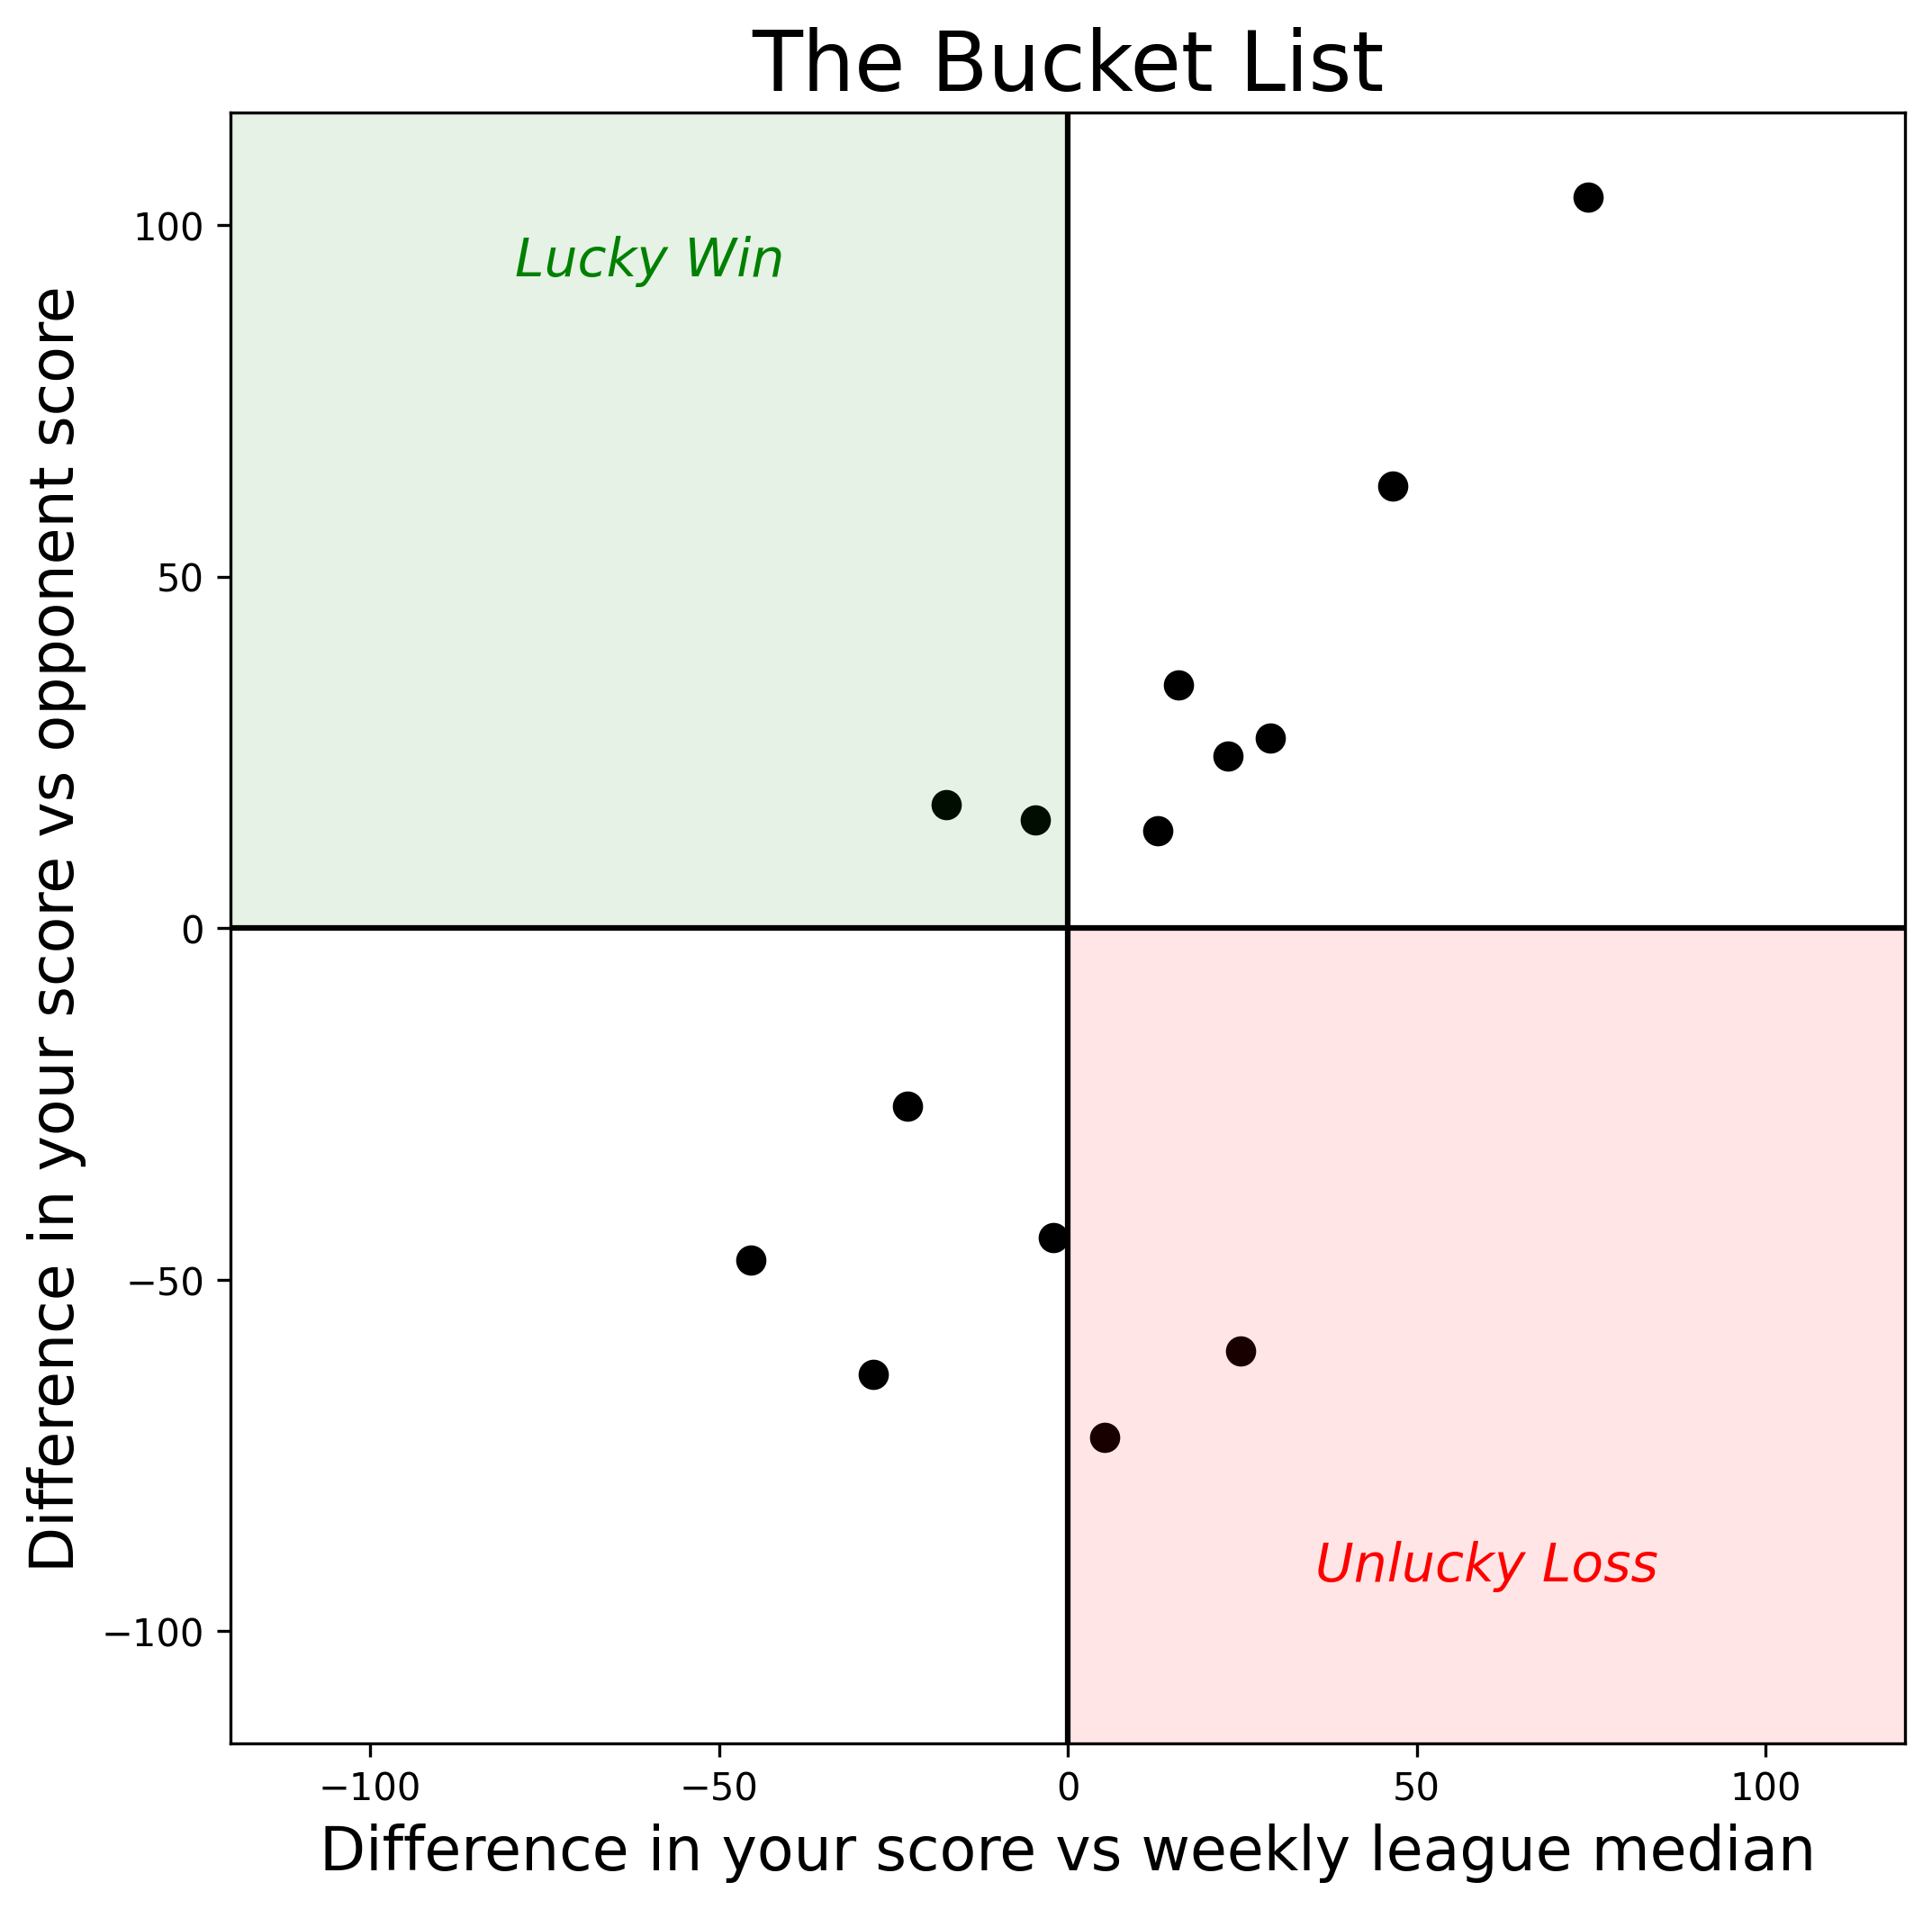

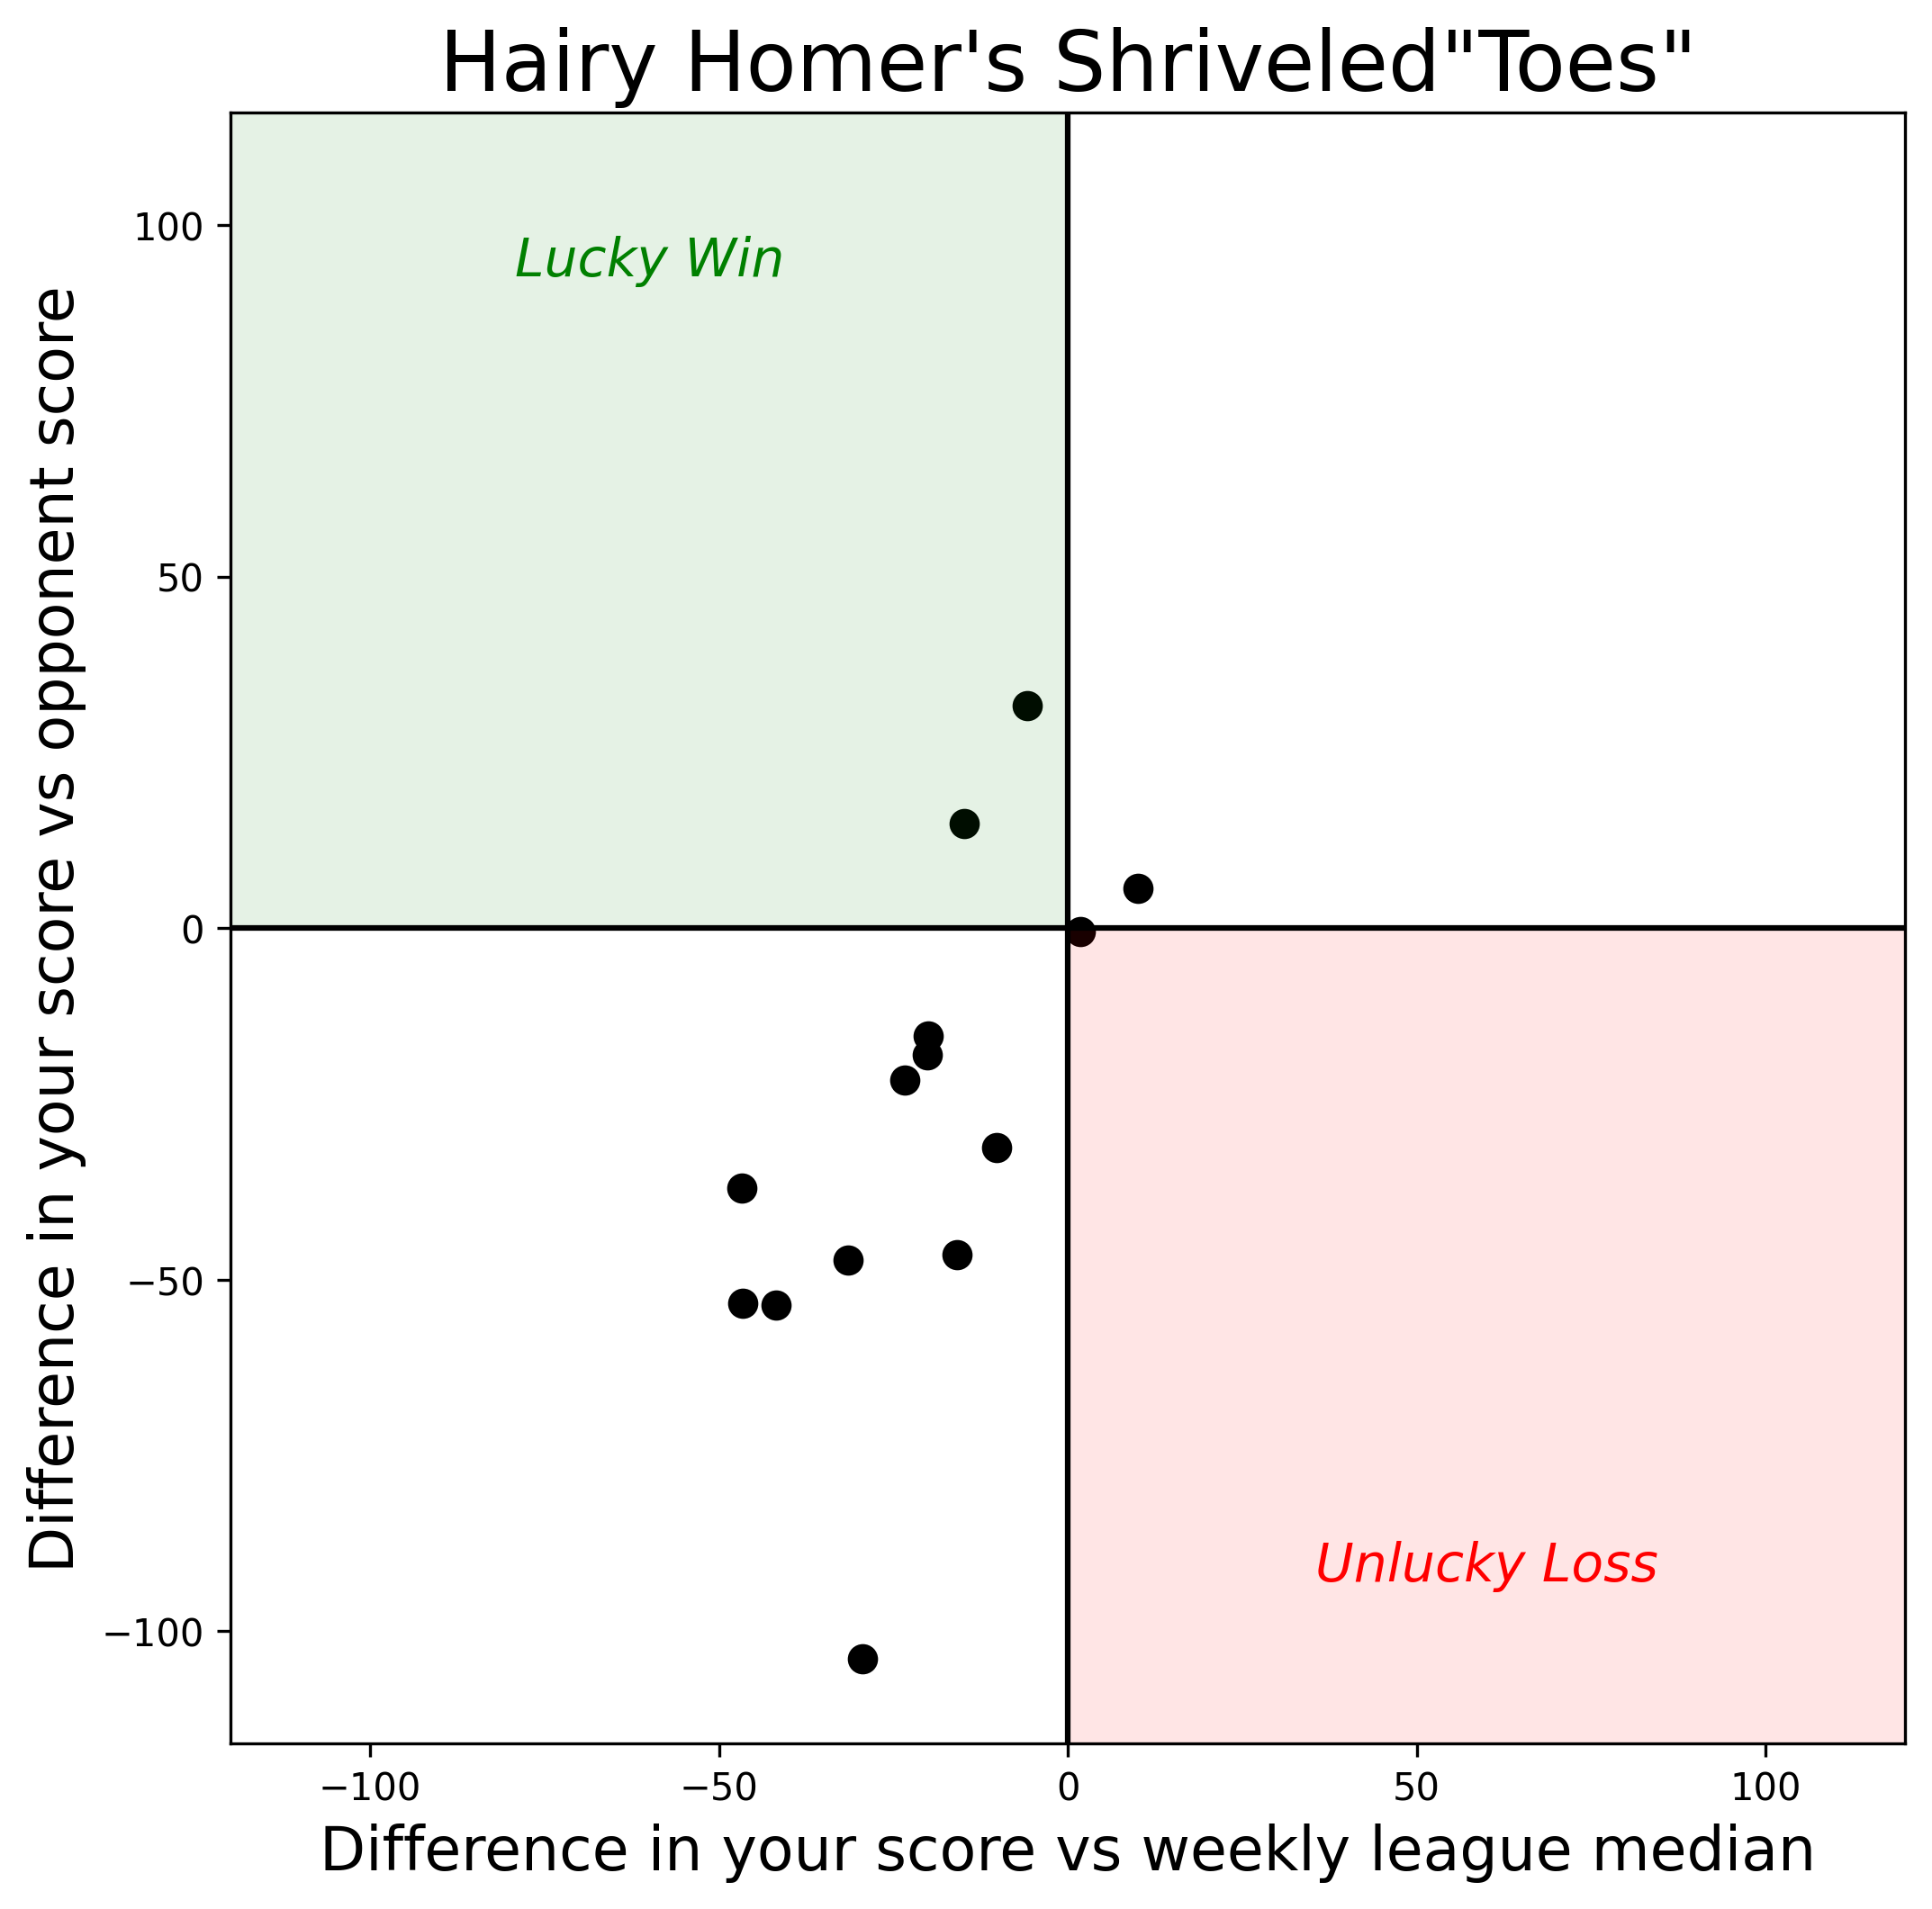

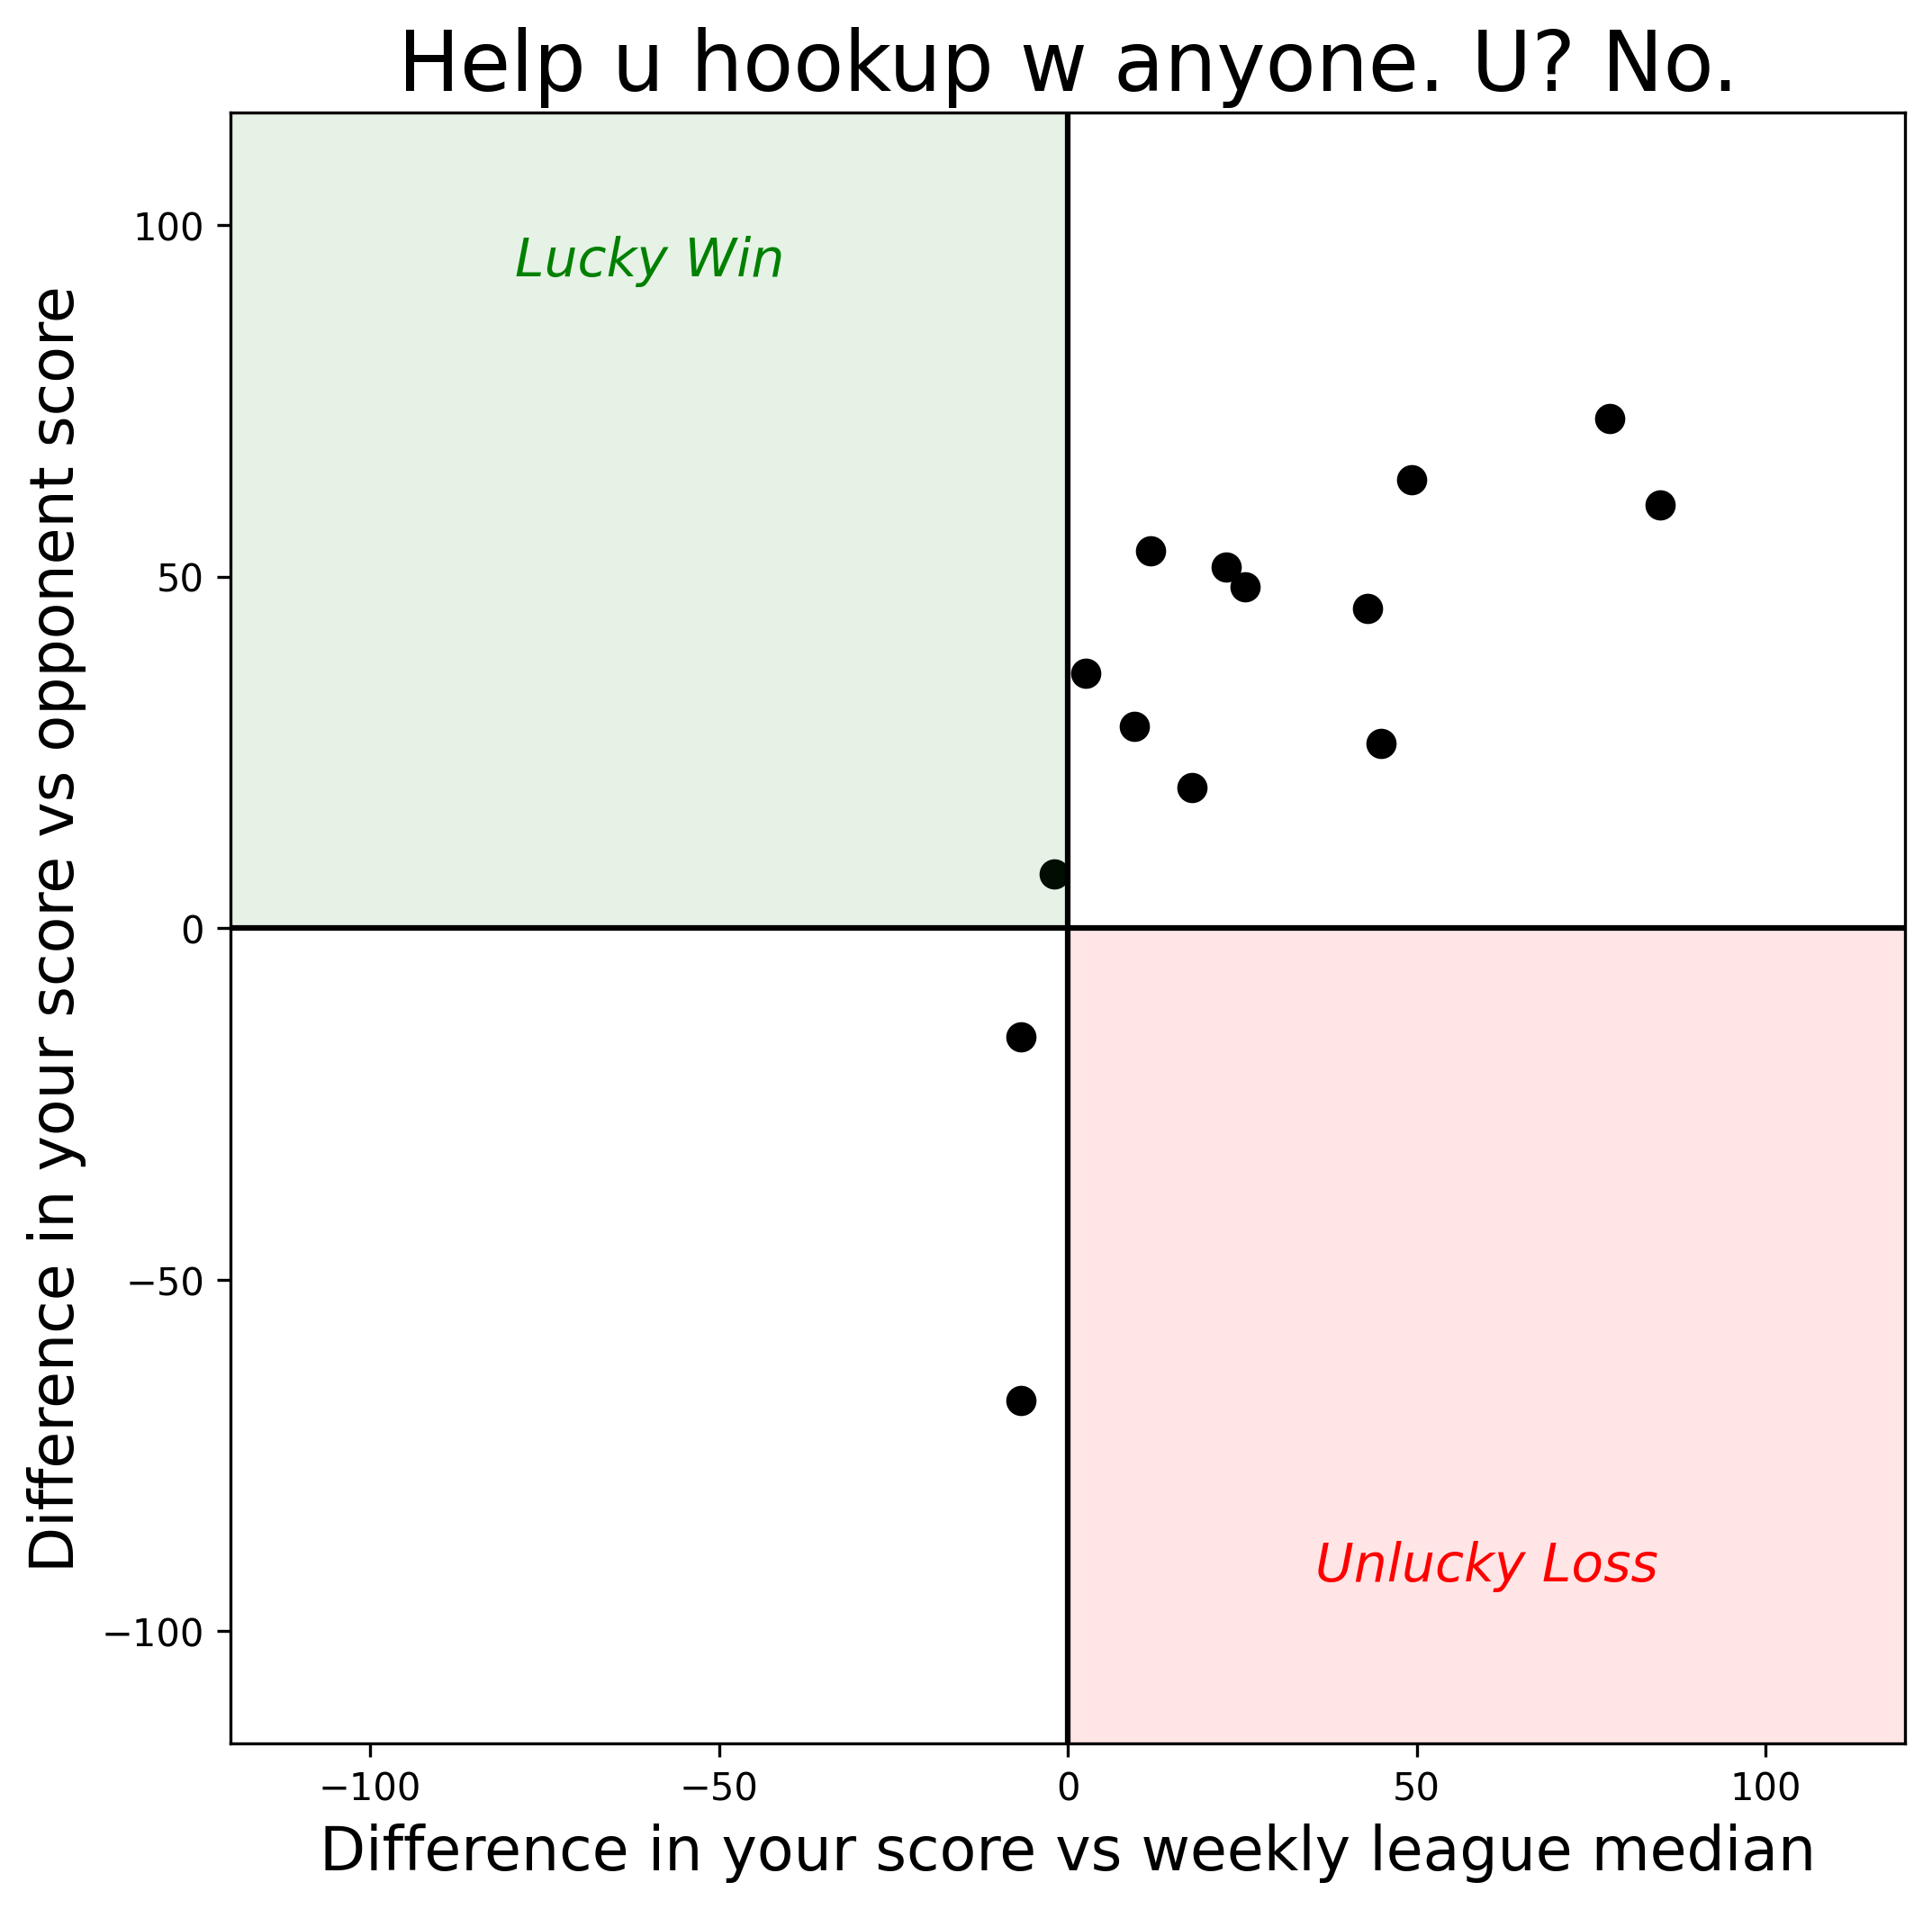

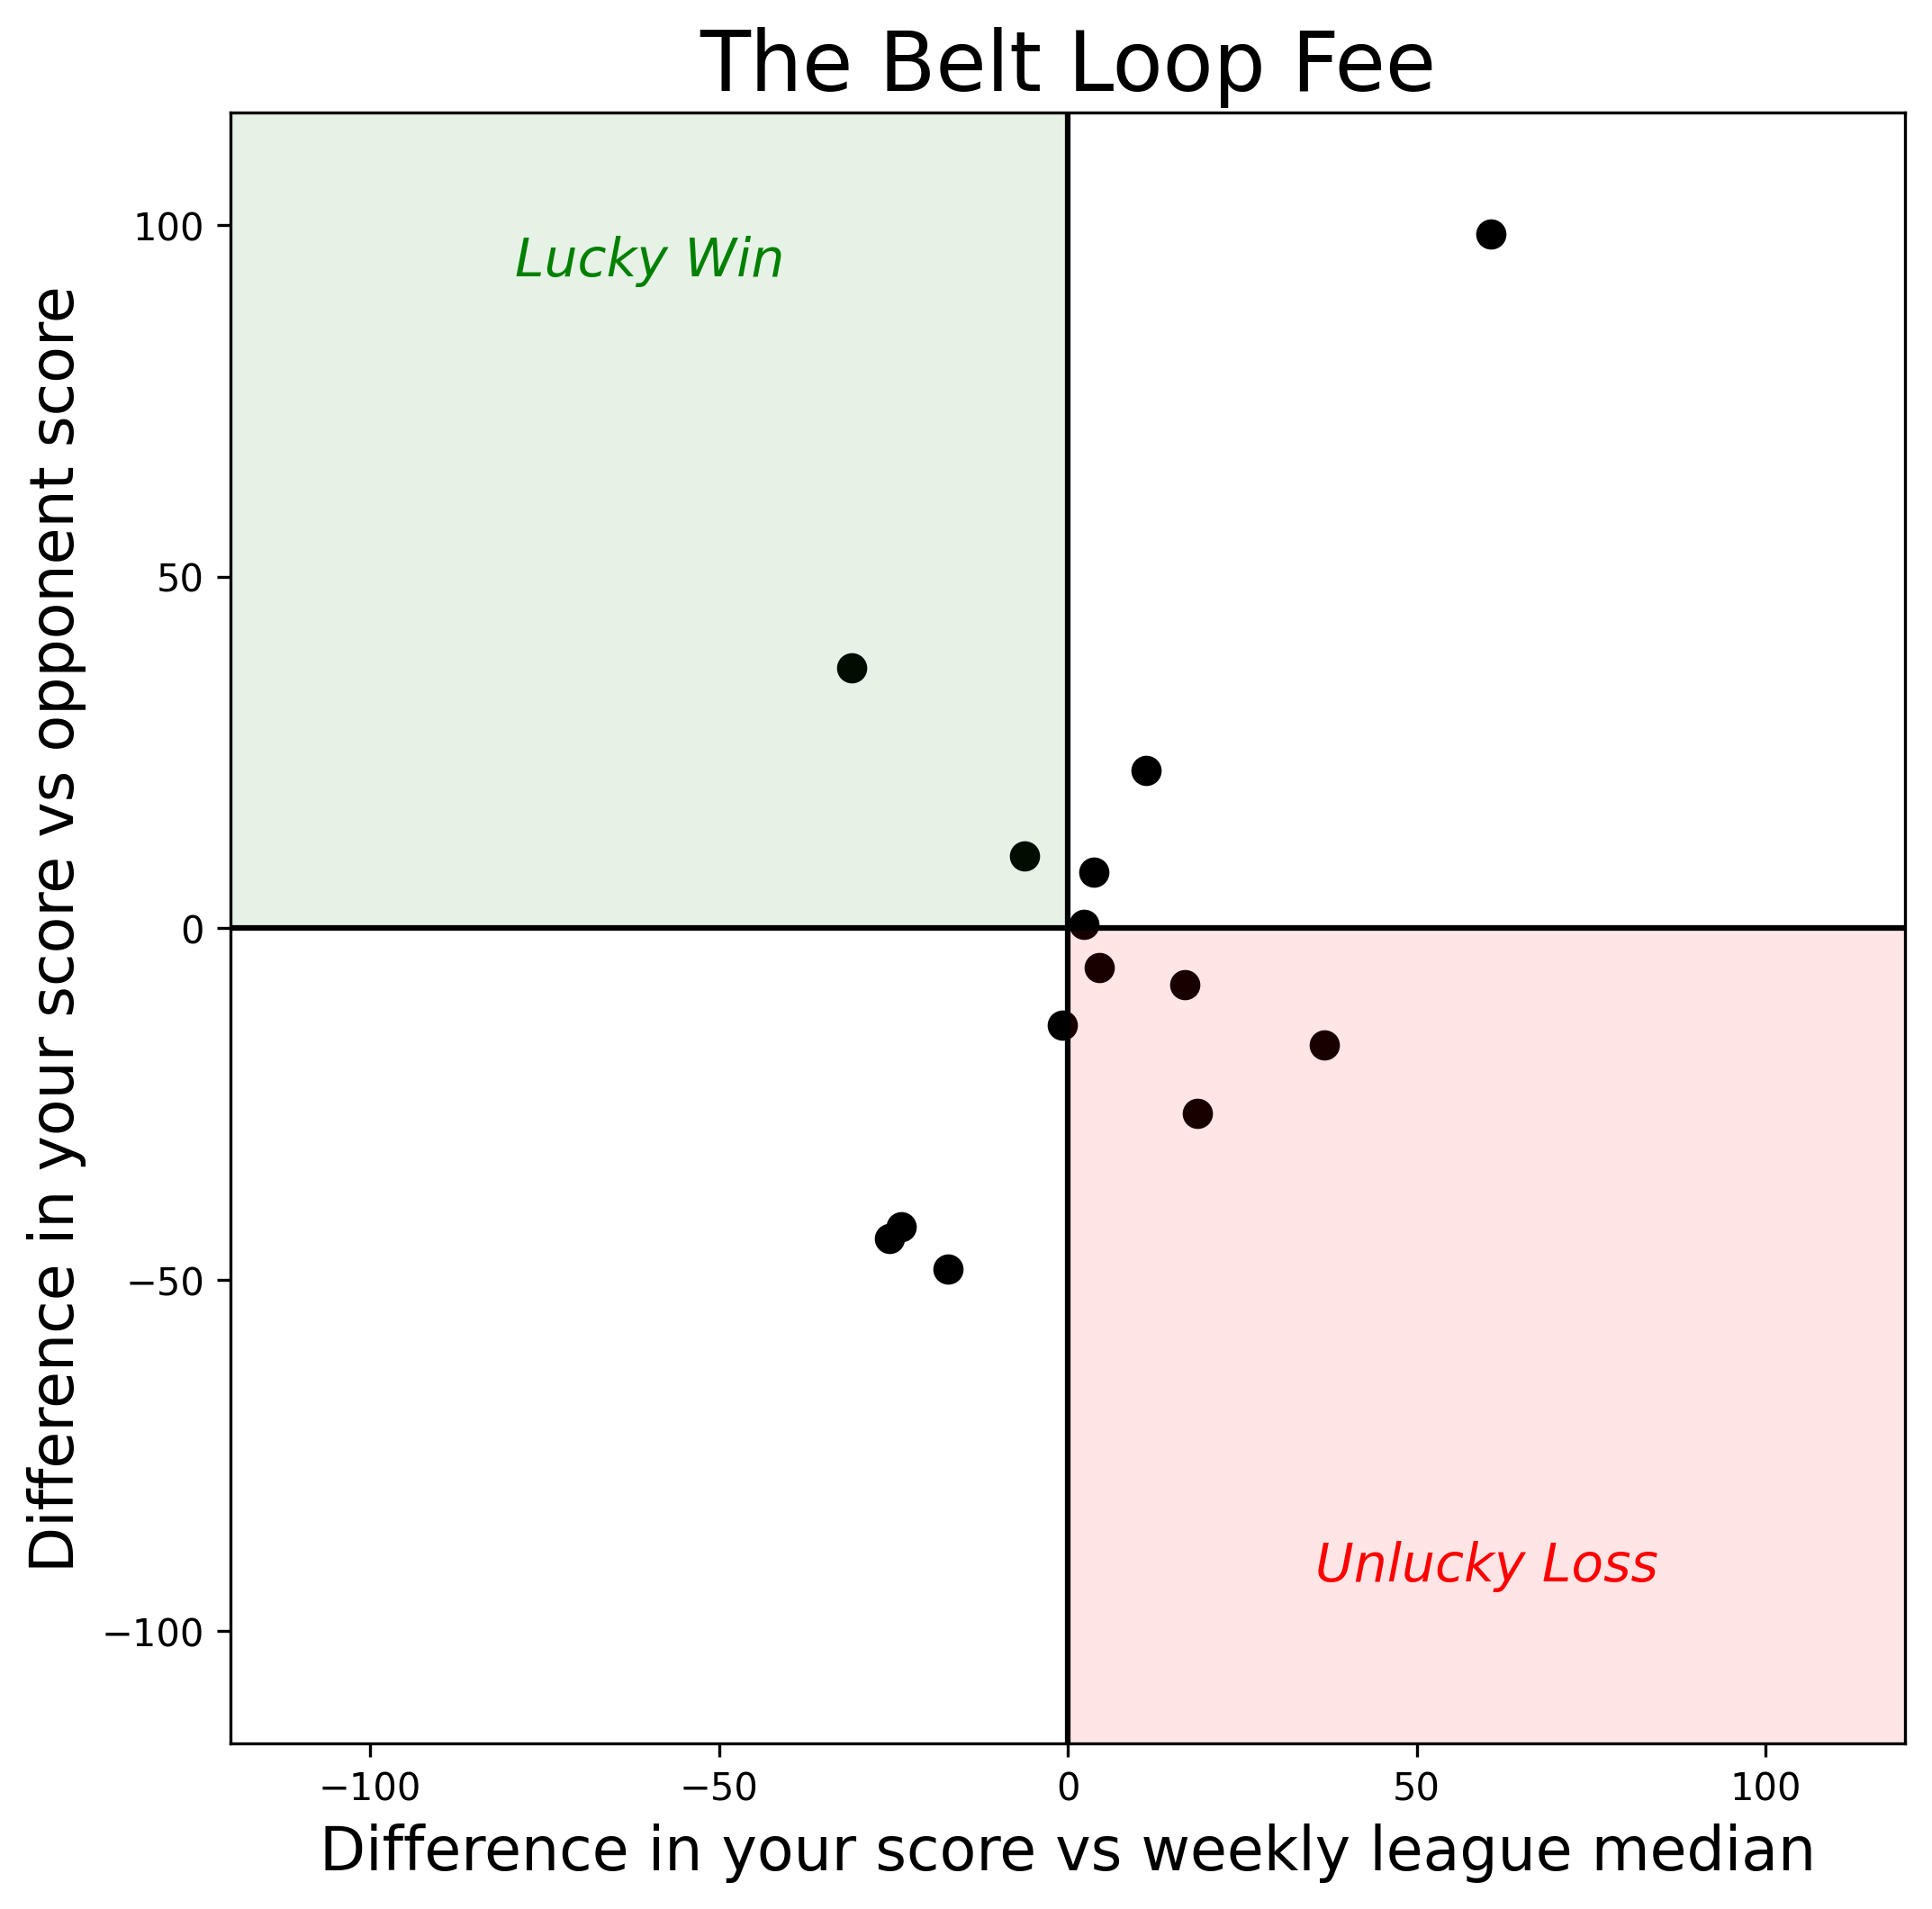

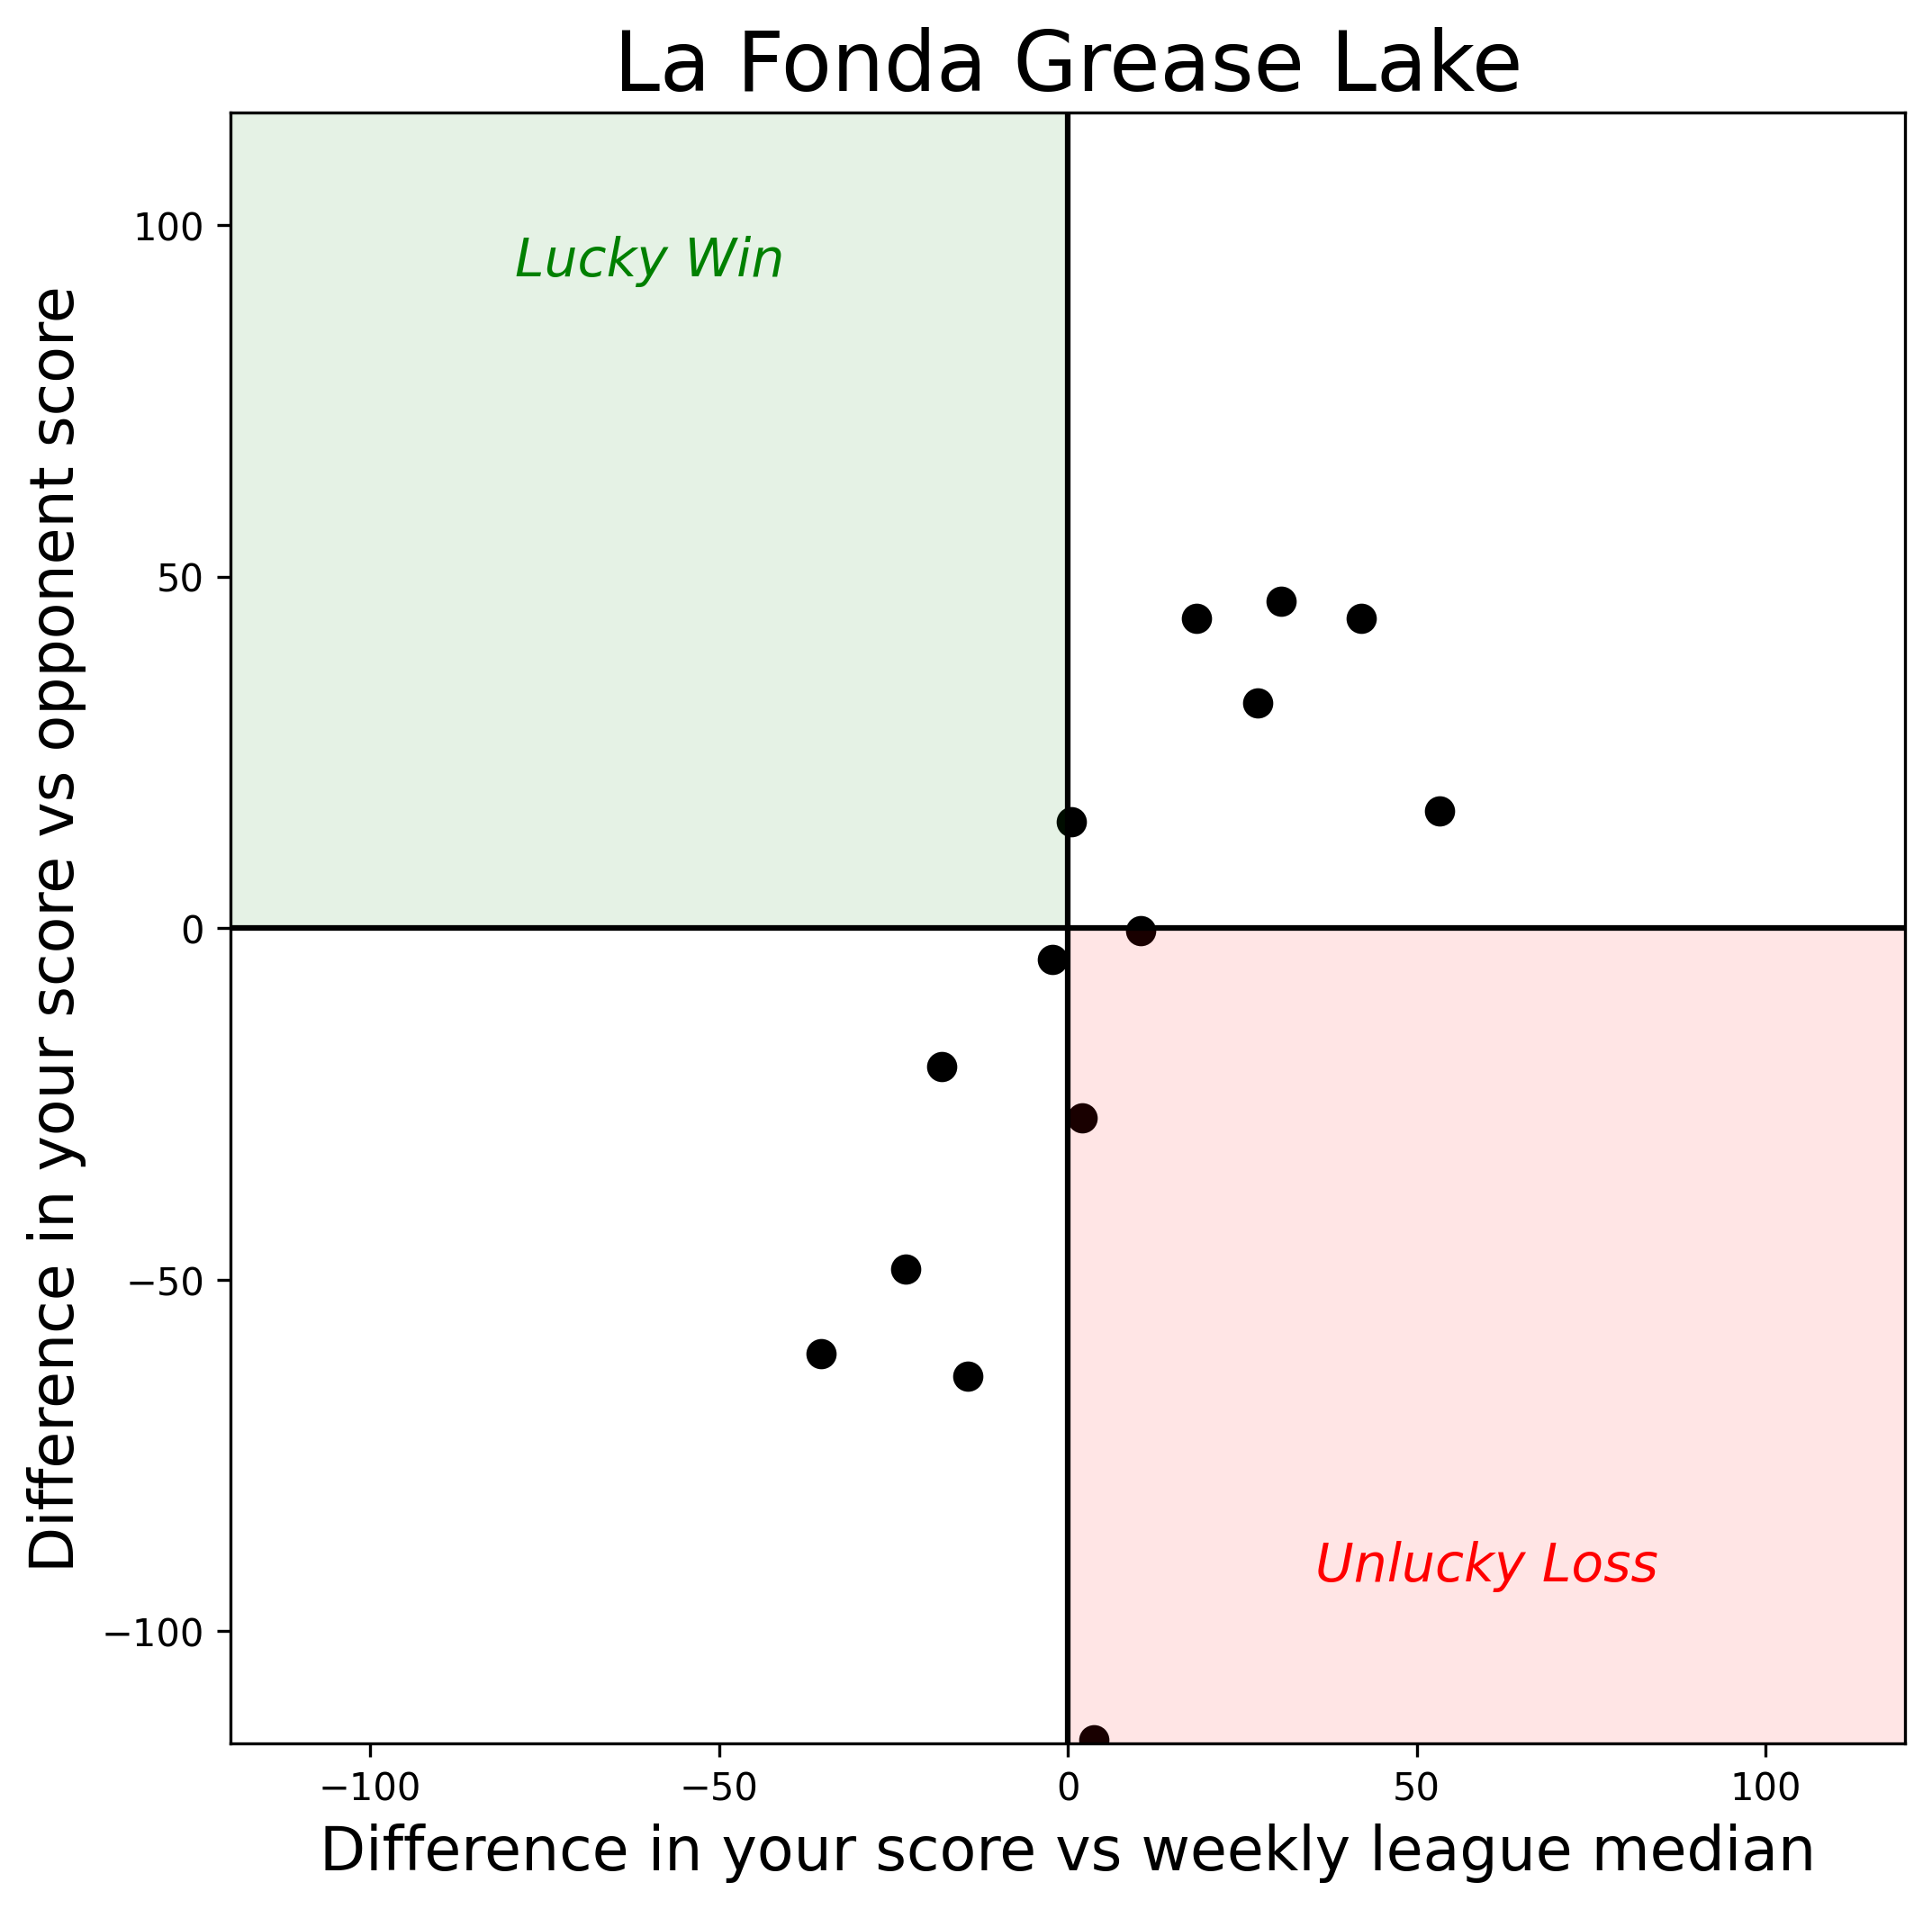

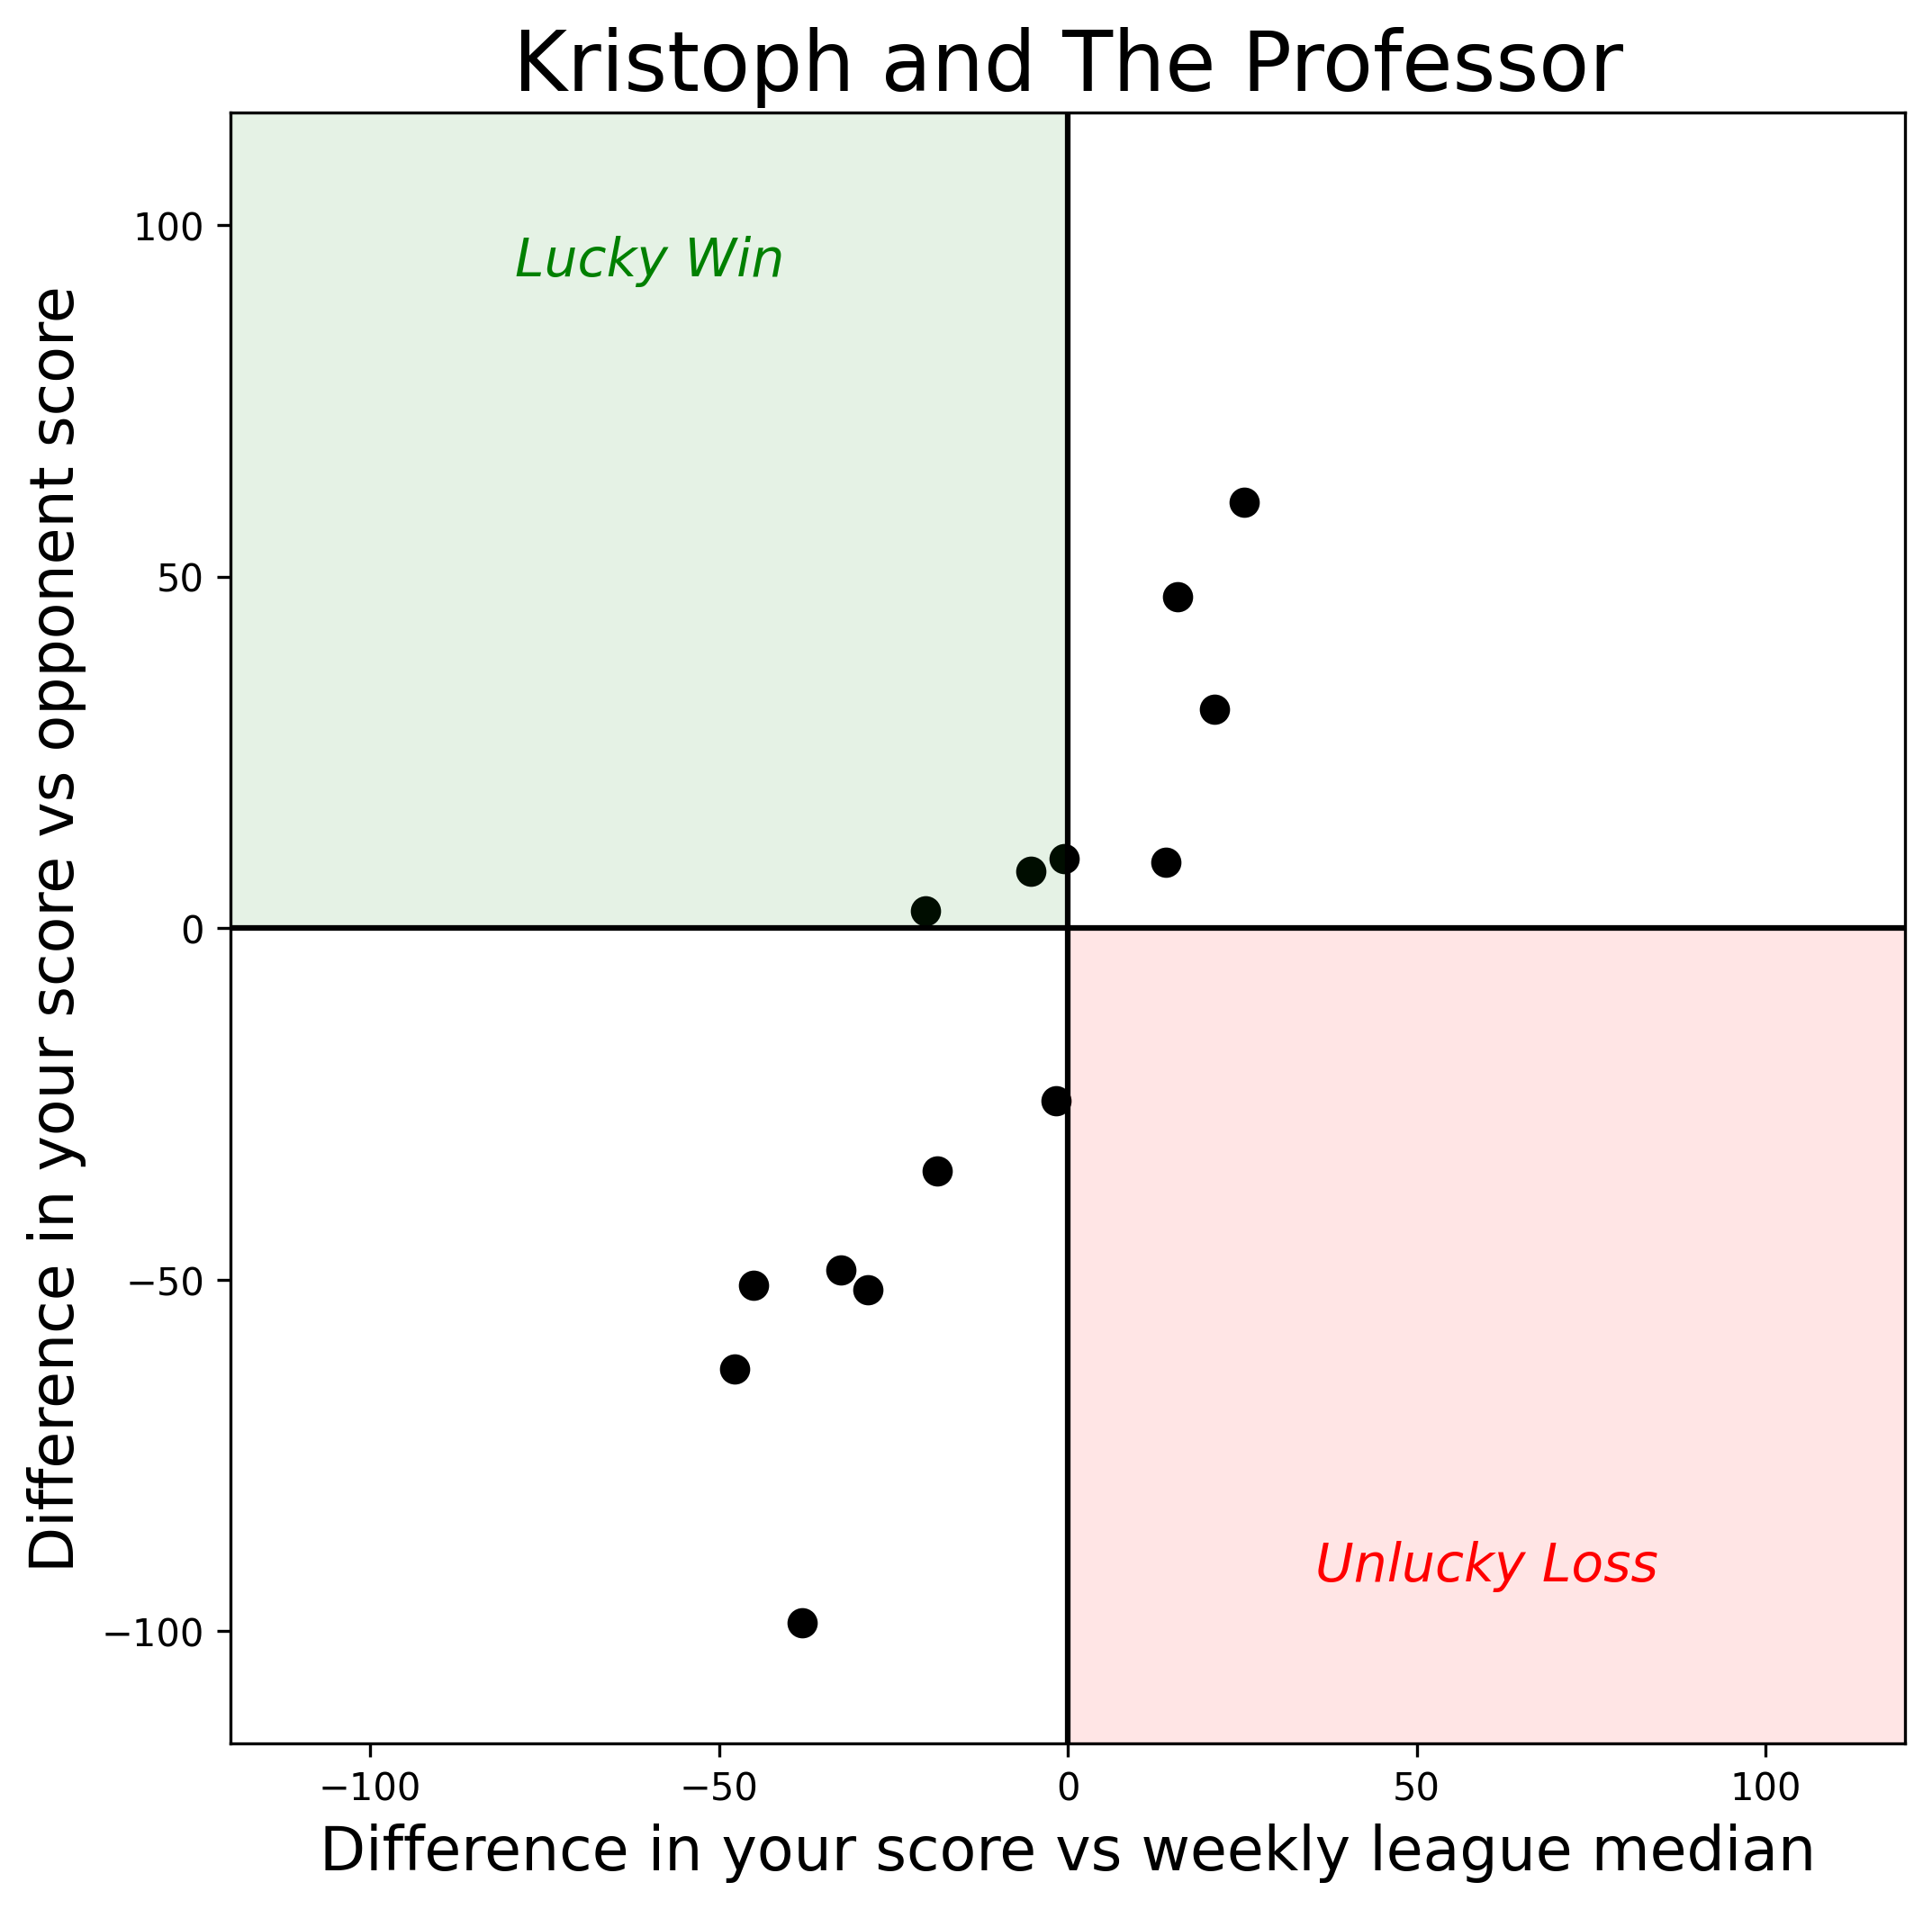

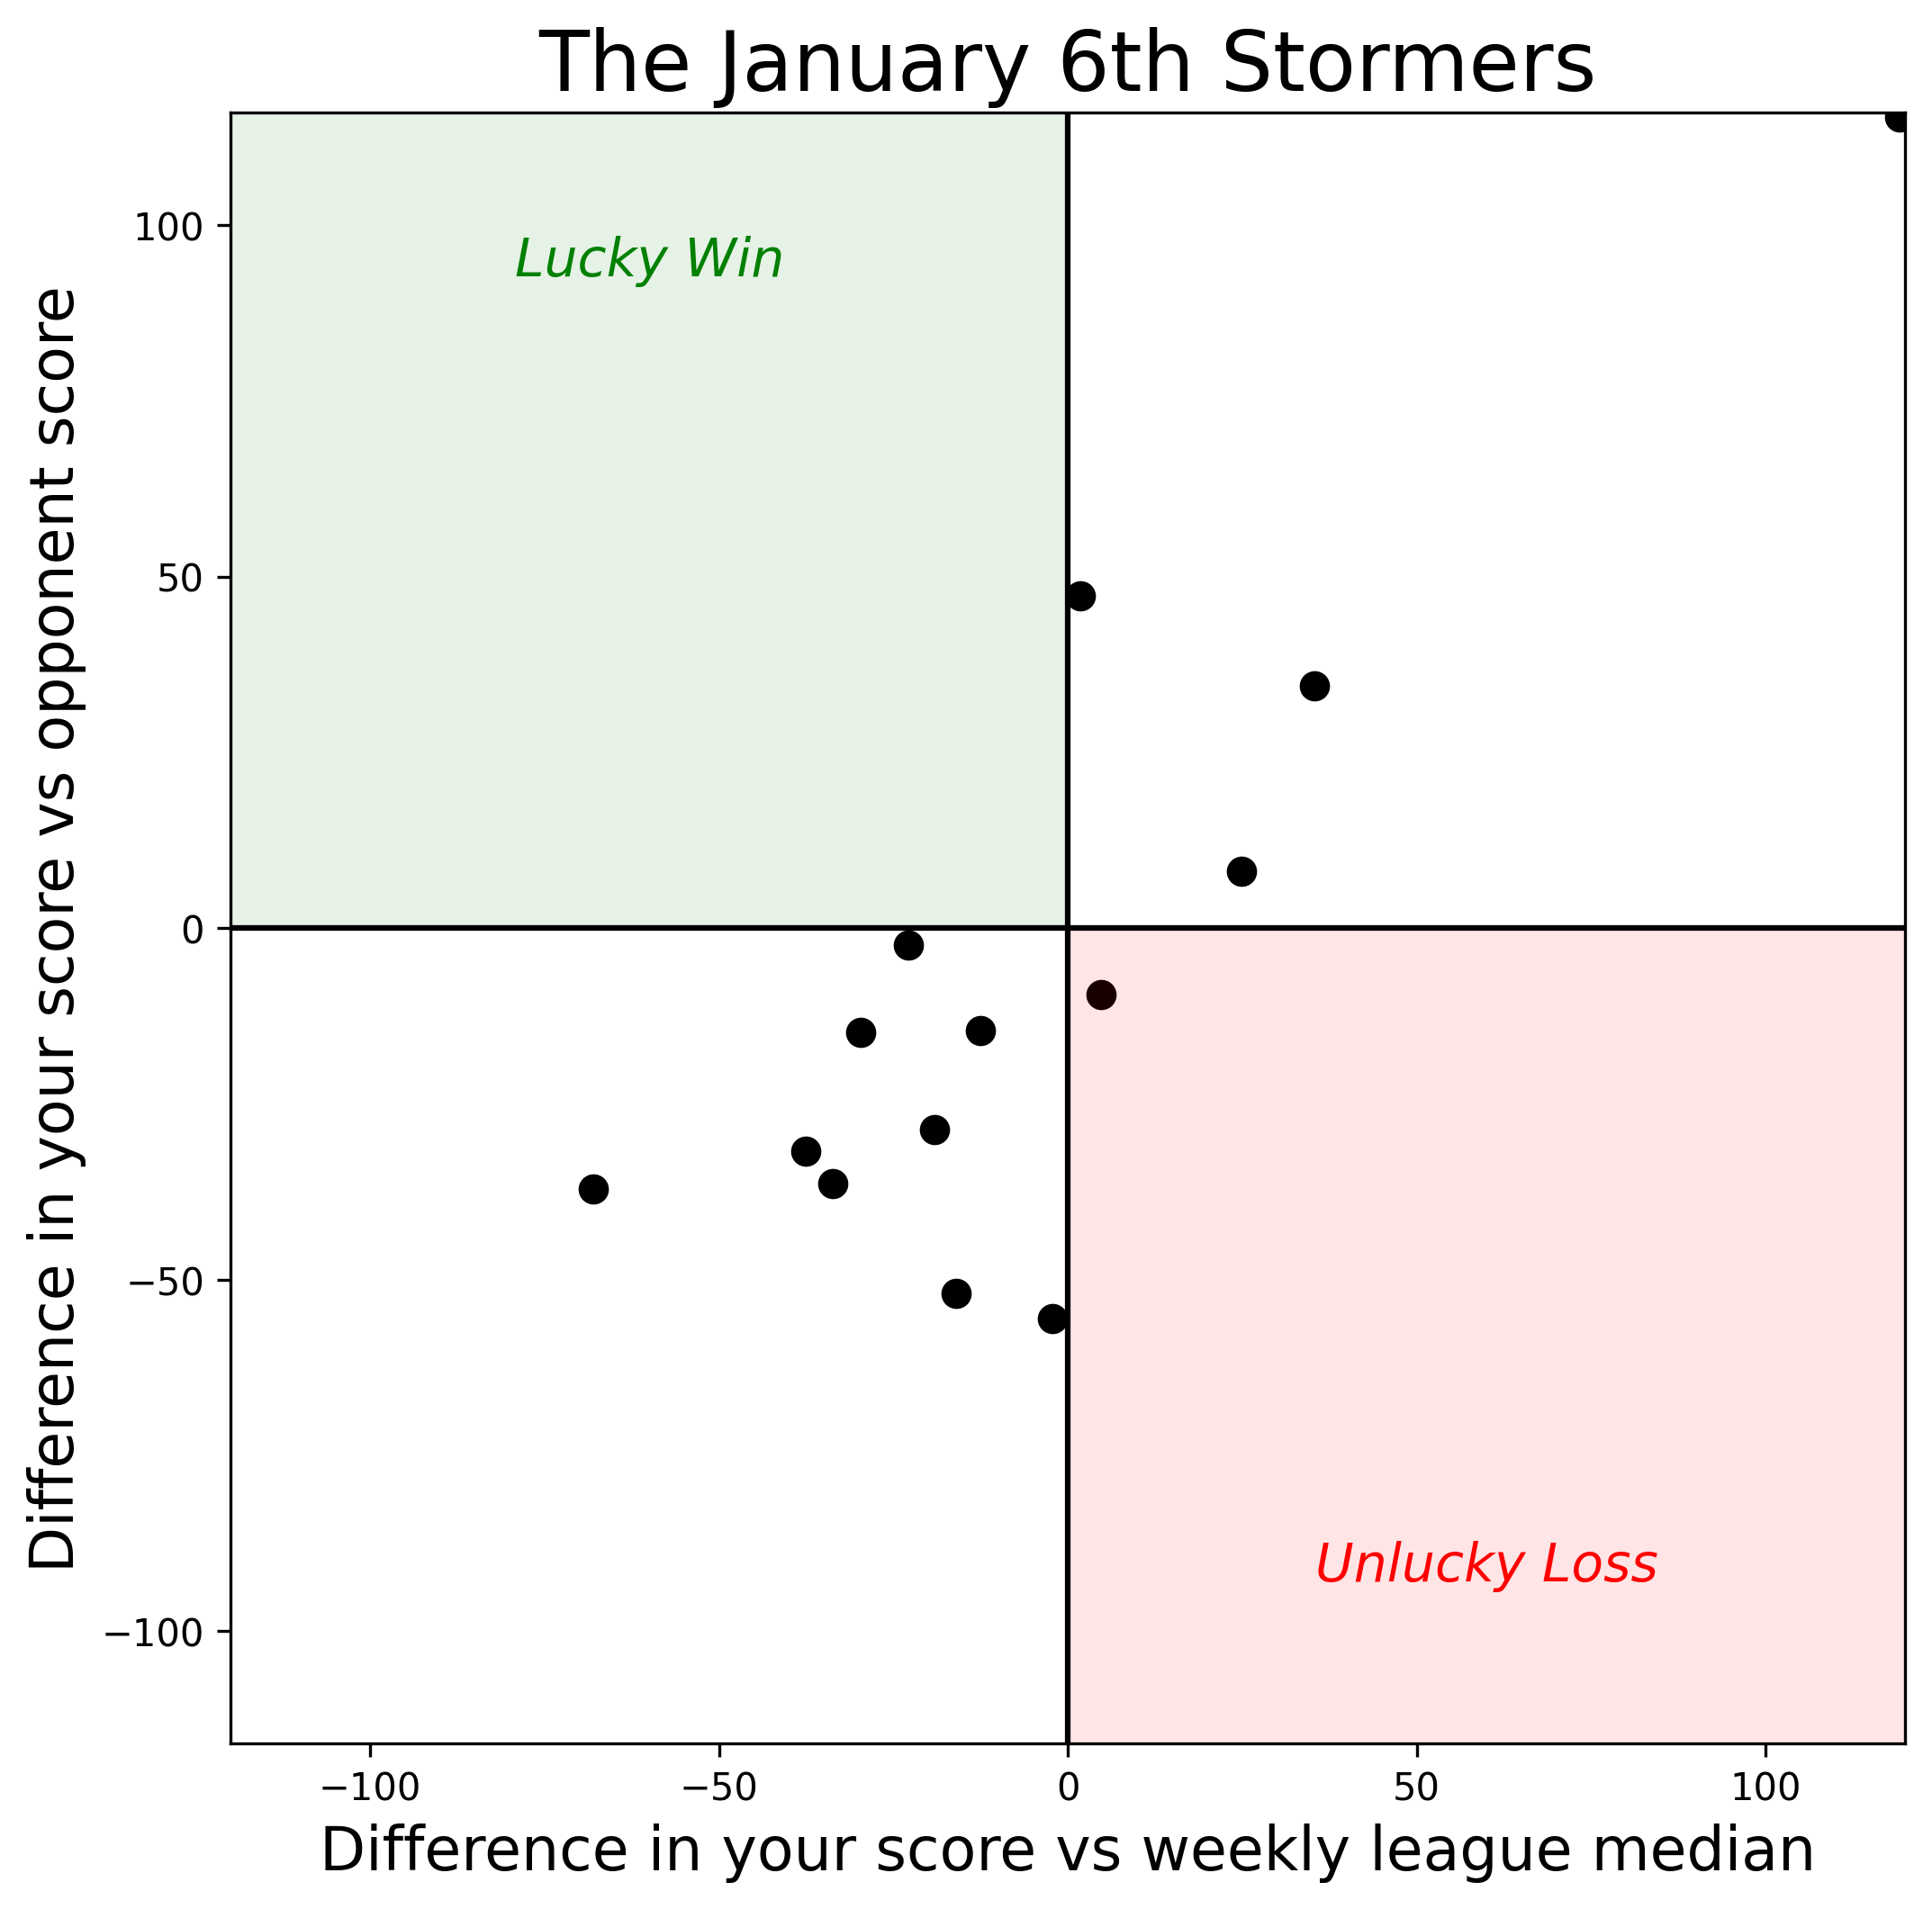

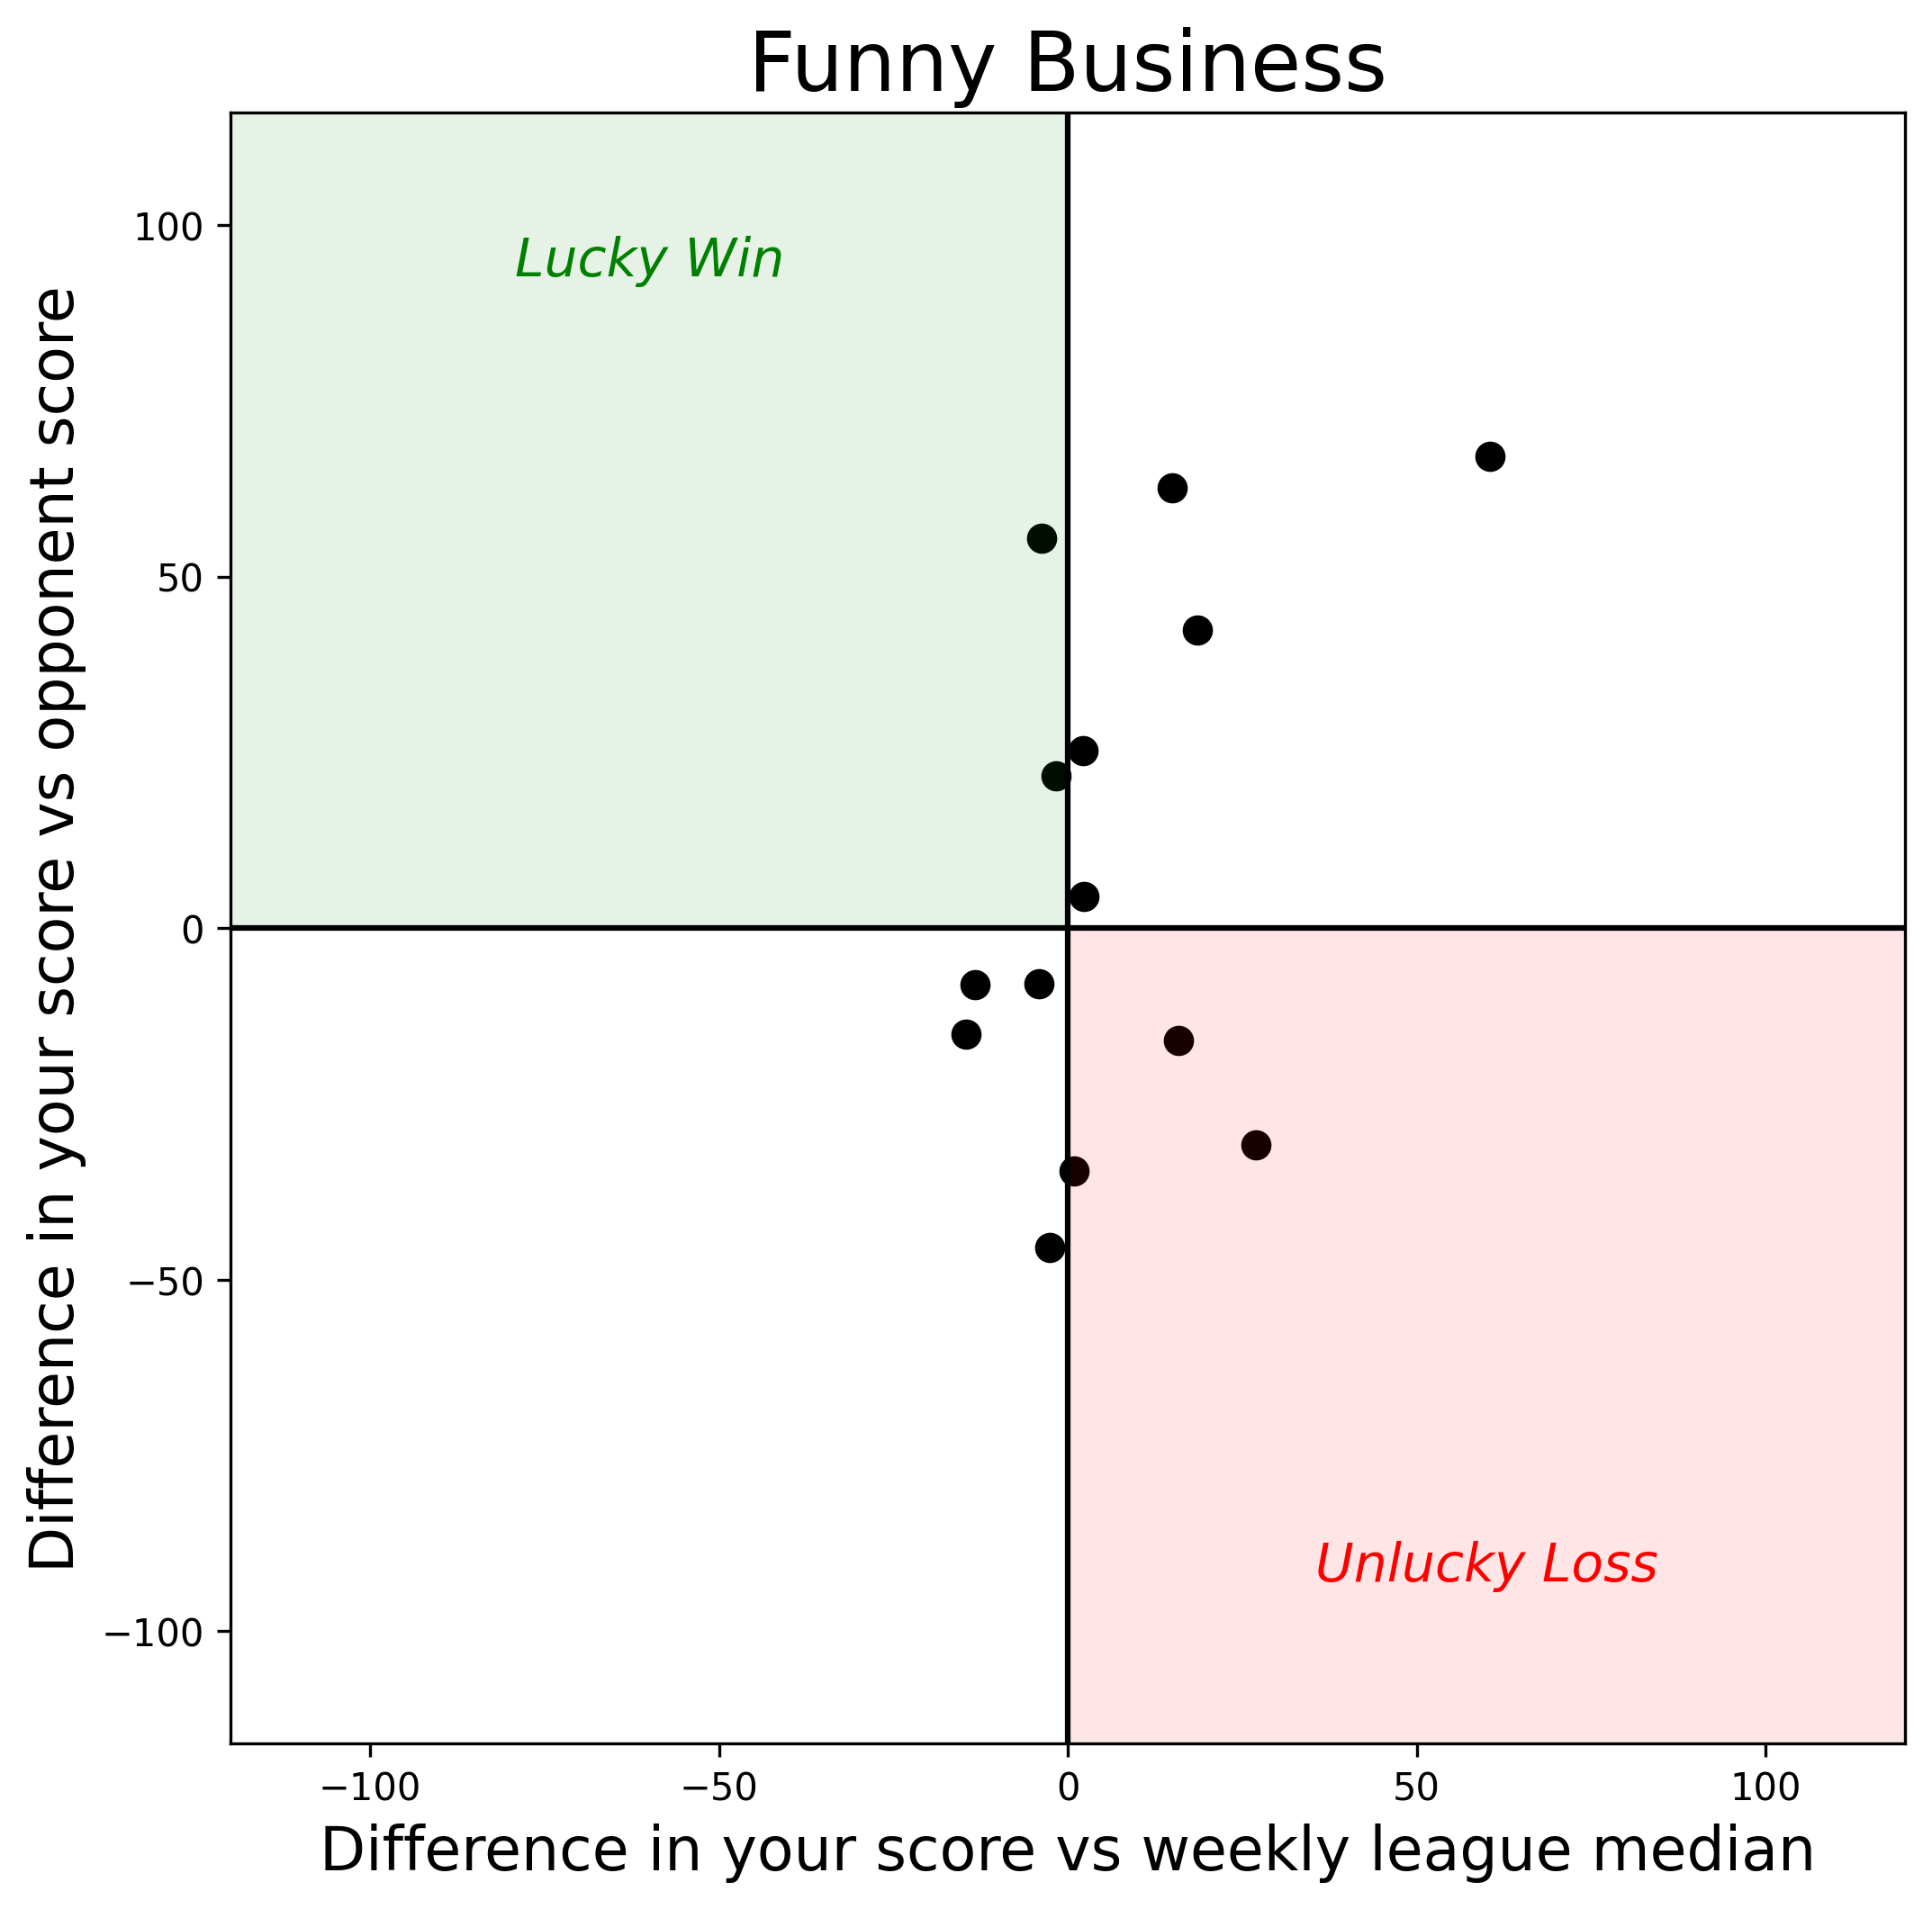

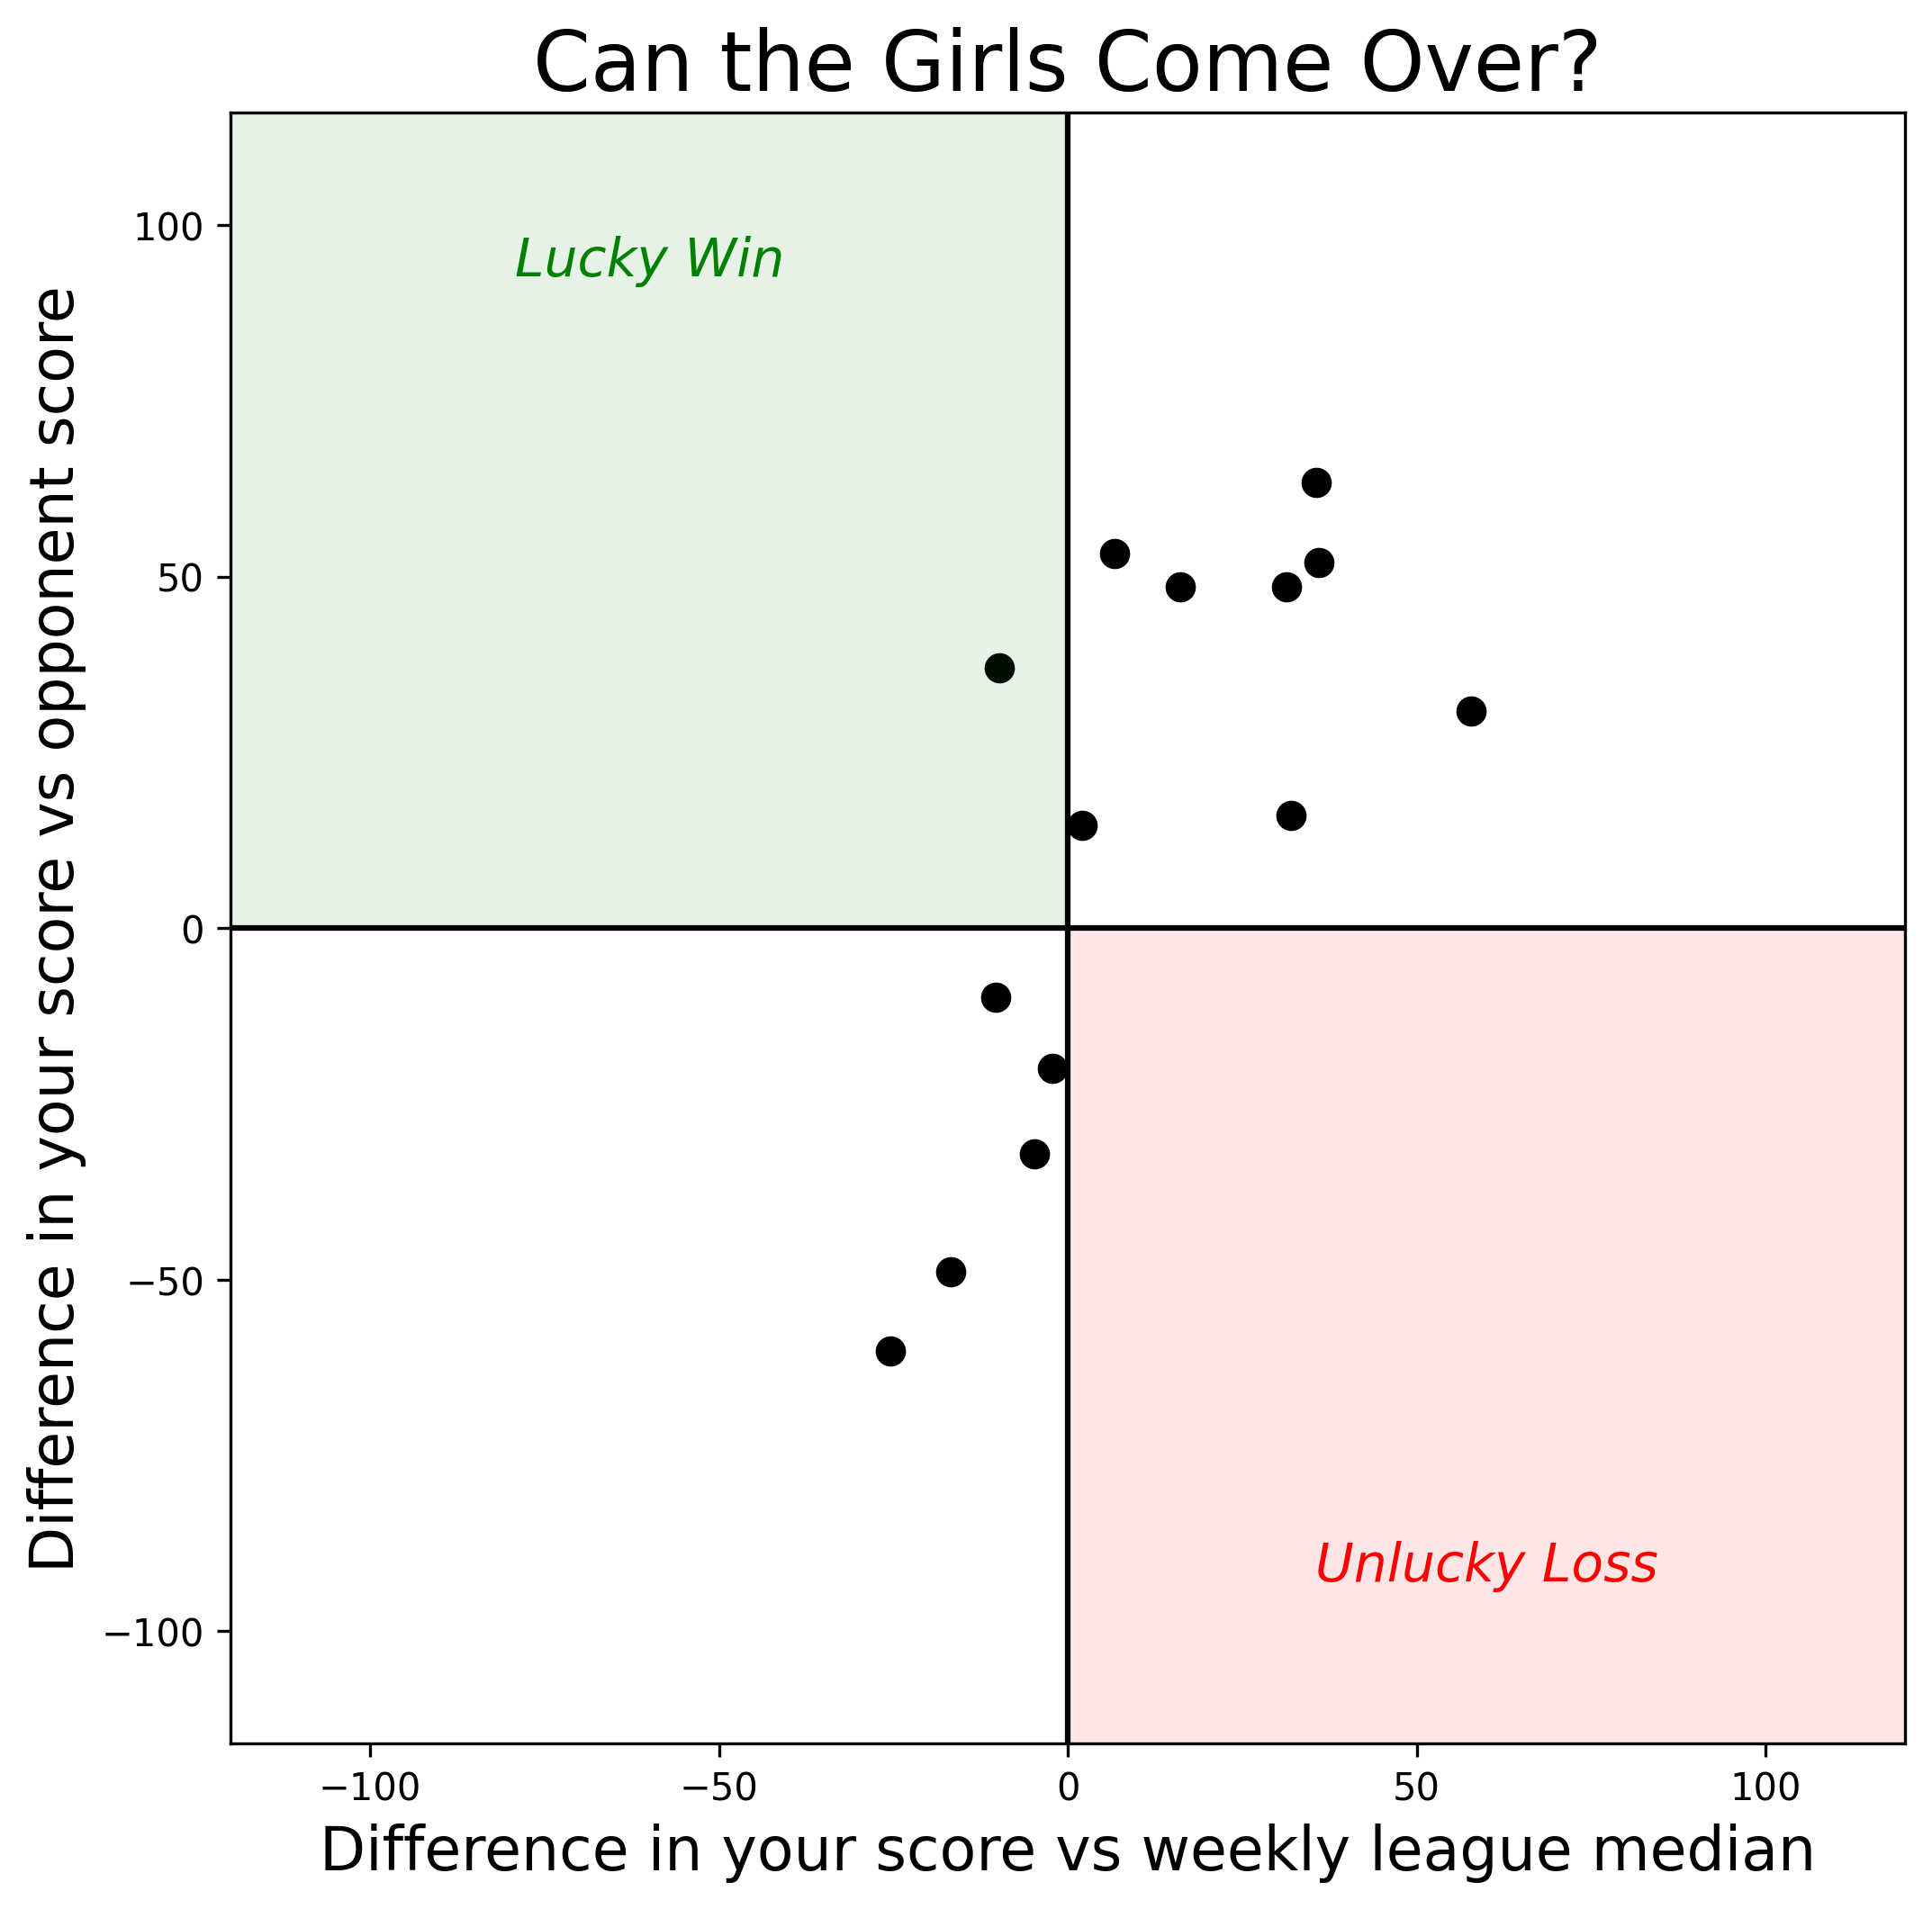

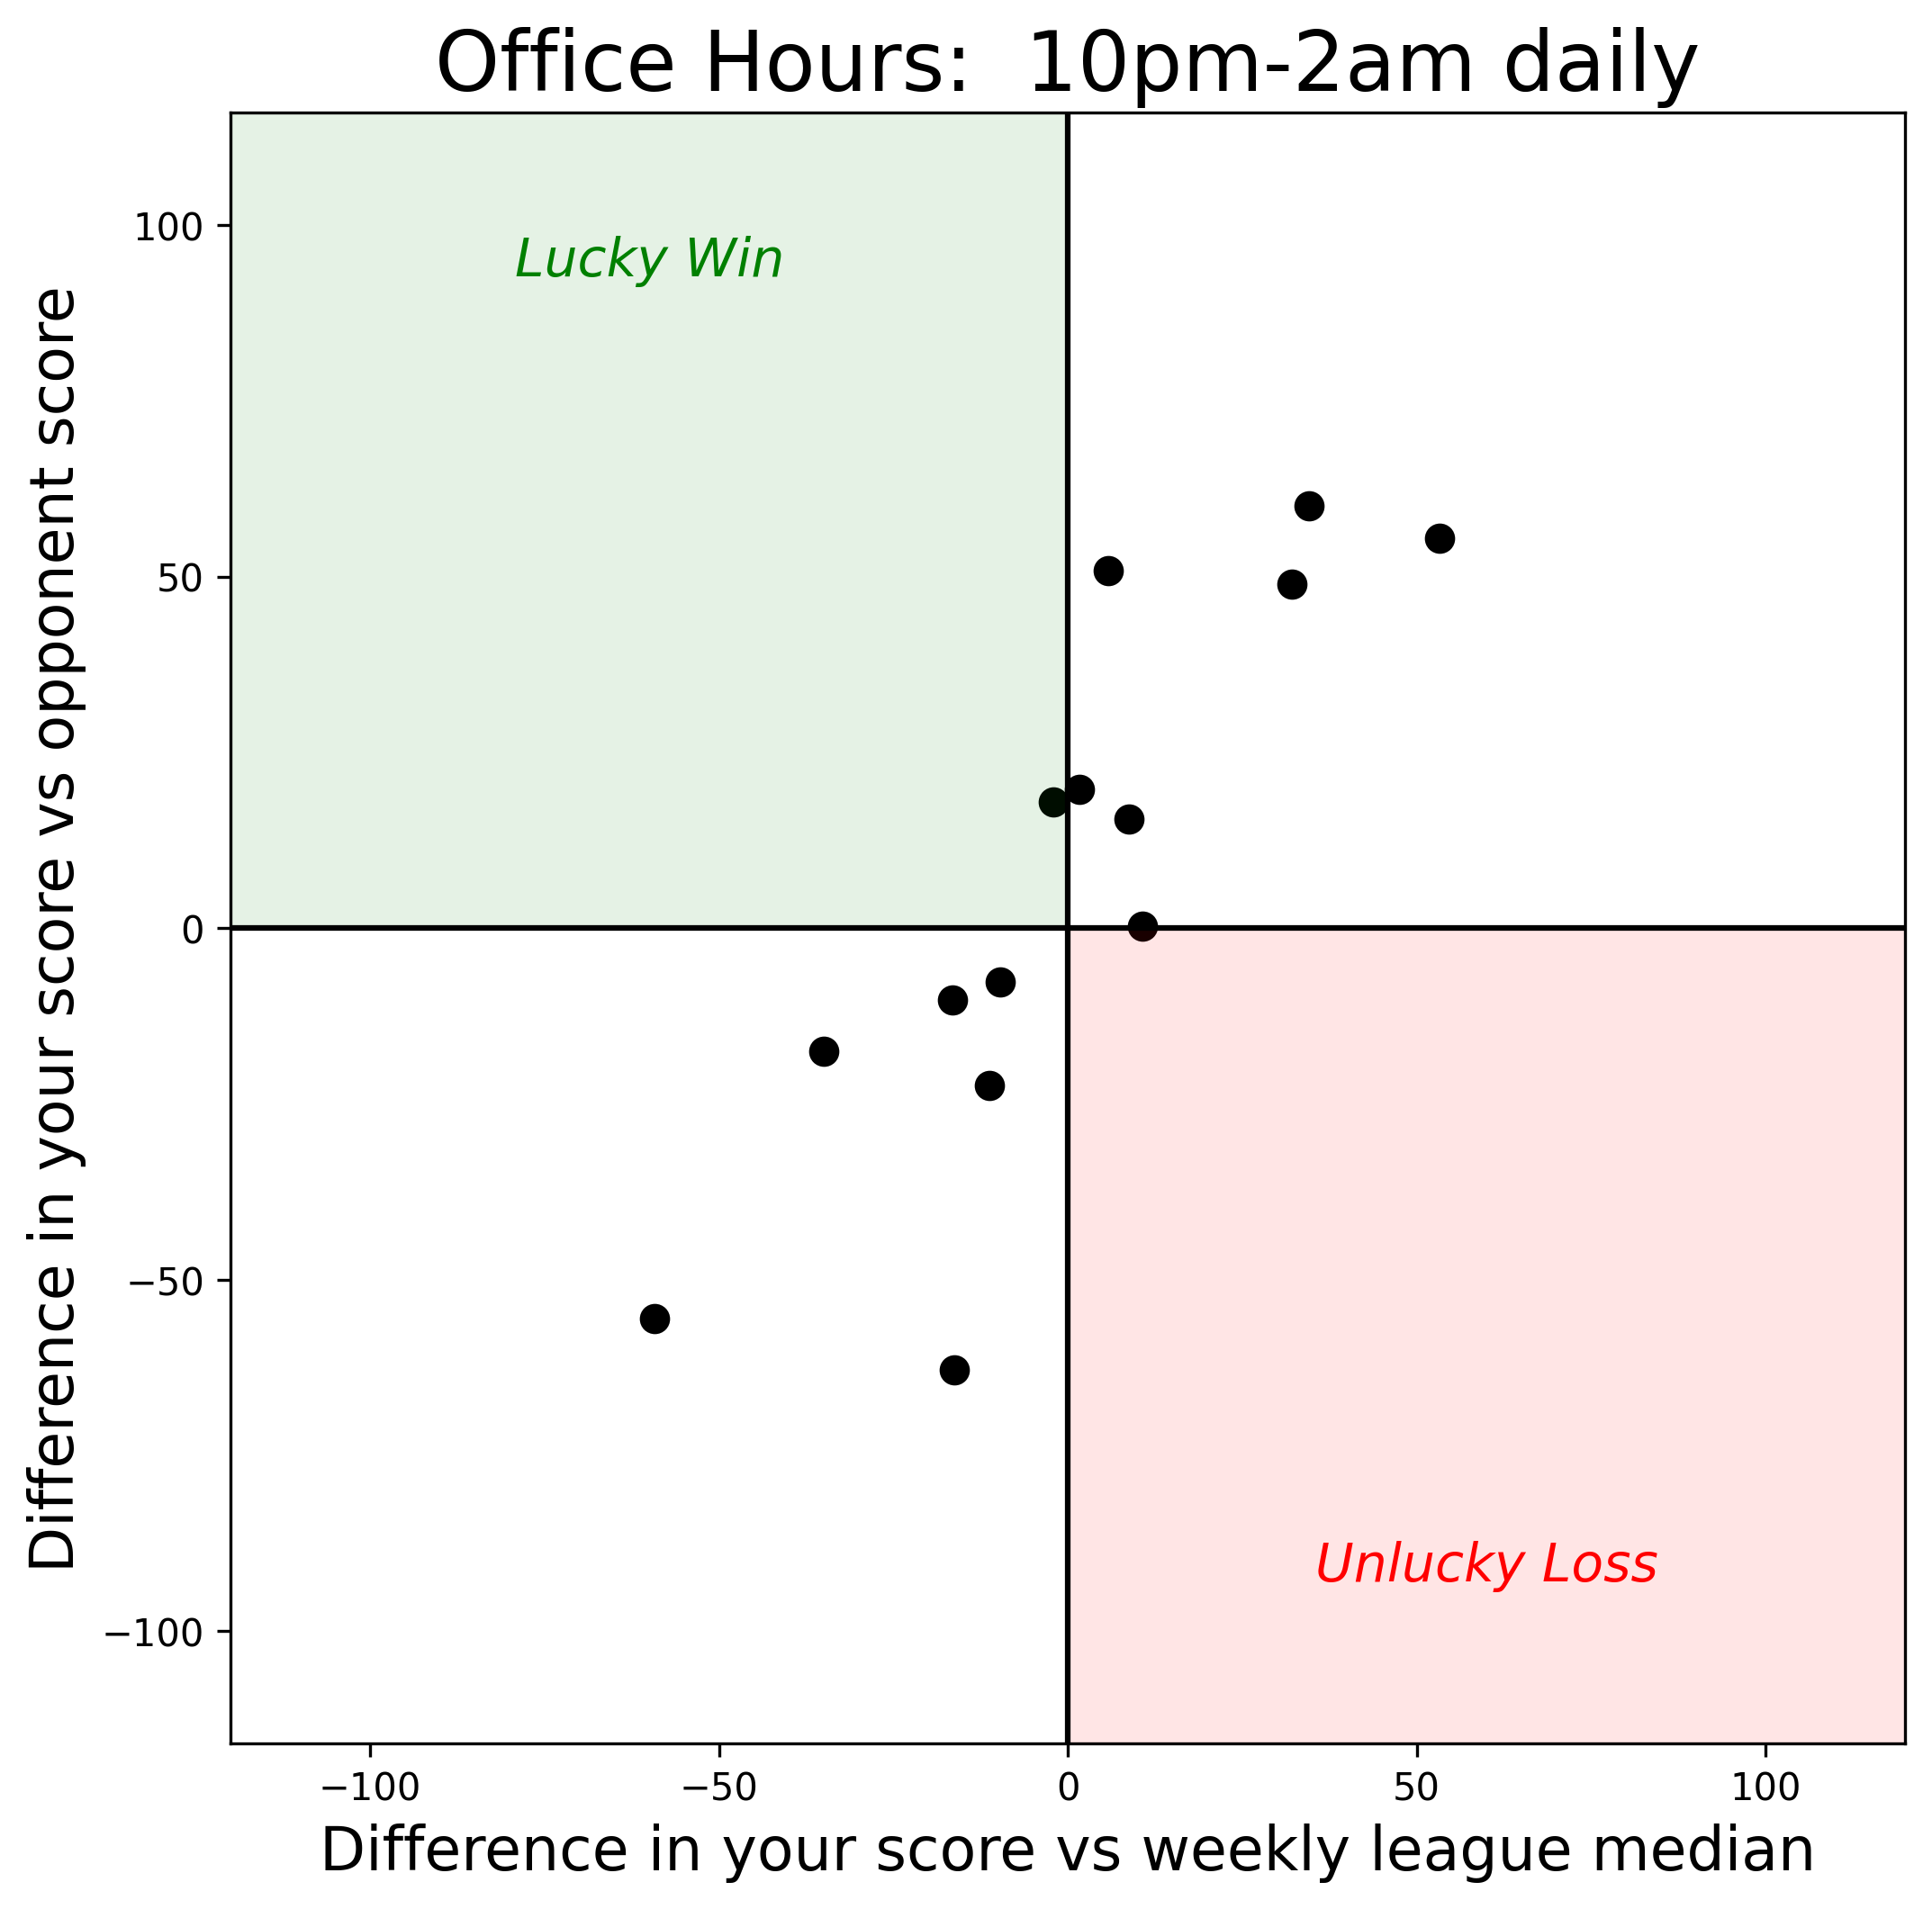

In [7]:
# Plot results

# Unluckly Loss = H2H loss when you were in top half of weekly scorers
# Lucky Win = H2H win when you were in bottom half of weekly scorers

# y axis: difference in your score vs opponent score
# x axis: difference in your score vs league median


x_bound = np.ceil(scores_df.abs().max().max())
y_bound = np.ceil(margins_df.abs().max().max())

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    
    plt.figure(figsize=[8,8])
    plt.scatter(x, y, color="black", s=50)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim(-x_bound, x_bound)
    plt.ylim(-y_bound, y_bound)
    plt.fill_between([0, -x_bound], 0, y_bound, facecolor='g', alpha=0.1)
    plt.fill_between([0, x_bound], 0, -y_bound, facecolor='r', alpha=0.1)
    plt.annotate("Lucky Win", xy=(-x_bound/2, y_bound*4/5), fontsize=14, ha="center", style="italic", color="g")
    plt.annotate("Unlucky Loss", xy=(x_bound/2, -y_bound*4/5), fontsize=14, ha="center", style="italic", color="r")
    plt.ylabel("Difference in your score vs opponent score", fontsize=16)
    plt.xlabel("Difference in your score vs weekly league median", fontsize=16)
    plt.title(team_map[scores_df.index.values[i]]["name"], fontsize=22)
    

In [14]:
# Summary table

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    team = team_map[scores_df.index.values[i]]["name"]

    lw, ul = 0, 0
    for j in range(len(x)):
        if x[j] < 0 and y[j] > 0:
            lw += 1
        elif x[j] >0 and y[j] < 0:
            ul += 1
            
    print(team)
    print("Lucky Wins: {}".format(lw))
    print("Unlucky Losses: {}".format(ul))
    


The Bucket List
Lucky Wins: 2
Unlucky Losses: 2
Hairy Homer's Shriveled"Toes"
Lucky Wins: 2
Unlucky Losses: 1
Help u hookup w anyone. U? No.
Lucky Wins: 1
Unlucky Losses: 0
The Belt Loop Fee
Lucky Wins: 2
Unlucky Losses: 4
La Fonda Grease Lake
Lucky Wins: 0
Unlucky Losses: 3
Kristoph and The Professor
Lucky Wins: 3
Unlucky Losses: 0
The January 6th Stormers
Lucky Wins: 0
Unlucky Losses: 1
Funny Business
Lucky Wins: 2
Unlucky Losses: 3
Can the Girls Come Over?
Lucky Wins: 1
Unlucky Losses: 0
Office Hours:  10pm-2am daily
Lucky Wins: 1
Unlucky Losses: 0
